# Downloading Data using API

In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d ashaychoudhary/anxiety-attack-factors-symptoms-and-severity

Dataset URL: https://www.kaggle.com/datasets/ashaychoudhary/anxiety-attack-factors-symptoms-and-severity
License(s): MIT
  0% 0.00/244k [00:00<?, ?B/s]
100% 244k/244k [00:00<00:00, 66.2MB/s]


In [ ]:
import zipfile
import os

with zipfile.ZipFile("/content/anxiety-attack-factors-symptoms-and-severity.zip", "r") as zip_ref:
    zip_ref.extractall("anxiety_dataset")

os.listdir("anxiety_dataset")

['anxiety_attack_dataset.csv']

In [ ]:
import pandas as pd

df = pd.read_csv("/content/anxiety_dataset/unclean_anxiety_attack_dataset.csv")
df.head()

ID  Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   1   56  female      other          9.6                           8.3   
1   2   46    male    teacher          6.4                           7.3   
2   3   32  female     doctor          6.9                           1.0   
3   4   60    male     doctor          9.2                           3.7   
4   5   25    male    student          9.2                           2.5   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                       175                                  6      no   
1                        97                                  6      no   
2                       467                                 14      no   
3                       471                                 16      no   
4                       364                                  2      no   

  Family History of Anxiety  Stress Level (1-10)  \
0                        no                    4   
1                        no                    3   
2                        no                    2   
3                       yes                    6   
4                       yes                    7   

   Heart Rate (bpm during attack)  Breathing Rate (breaths/min)  \
0                             145                            33   
1                             143                            18   
2                              60                            34   
3                              94                            19   
4                             152                            15   

   Sweating Level (1-5) Dizziness Medication  Therapy Sessions (per month)  \
0                     3        no         no                             4   
1                     5       yes         no                             0   
2                     1        no         no                             7   
3                     1        no        yes                             4   
4                     4        no        yes                             0   

  Recent Major Life Event  Diet Quality (1-10)  \
0                     yes                    9   
1                      no                    9   
2                     yes                   10   
3                     yes                    5   
4                      no                    1   

   Severity of Anxiety Attack (1-10)  
0                                 10  
1                                  8  
2                                  5  
3                                  8  
4                                  1

# Data Cleaning

In [ ]:
df_unclean = pd.read_csv("/content/anxiety_dataset/unclean_anxiety_attack_dataset.csv")

df_unclean.info(), df_unclean.head(), df_unclean.describe(), df_unclean.isnull().sum(), df_unclean.duplicated().sum(), df_unclean.nunique(), df_unclean.columns, df_unclean.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

(None,
    ID  Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
 0   1   56  female      other          9.6                           8.3   
 1   2   46    male    teacher          6.4                           7.3   
 2   3   32  female     doctor          6.9                           1.0   
 3   4   60    male     doctor          9.2                           3.7   
 4   5   25    male    student          9.2                           2.5   
 
    Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
 0                       175                                  6      no   
 1                        97                                  6      no   
 2                       467                                 14      no   
 3                       471                                 16      no   
 4                       364                                  2      no   
 
   Family History of Anxiety  Stress Level (1-10)  \
 0                      

In [ ]:
df_clean = pd.read_csv("/content/anxiety_dataset/unclean_anxiety_attack_dataset.csv")

df_clean = df_clean.drop_duplicates()

for col in df_clean.columns:
    if col != 'ID':
        if df_clean[col].dtype == 'object':
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
        else:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())

num_cols = ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
            'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)', 'Heart Rate (bpm during attack)',
            'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Therapy Sessions (per month)',
            'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)']

for col in num_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')  # Convert directly to numeric type

from scipy.stats import zscore

df_numeric = df_clean[num_cols].dropna().copy()  # Remove NaN for proper Z-score calculation

z_scores = np.abs(zscore(df_numeric))
outlier_mask = (z_scores < 3).all(axis=1)

df_clean = df_clean.loc[outlier_mask.index]

cat_cols = ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety', 'Dizziness',
            'Medication', 'Recent Major Life Event']

for col in cat_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

df_clean['ID'] = pd.to_numeric(df_clean['ID'], errors='coerce')
max_id = df_clean['ID'].dropna().max()
missing_id_indices = df_clean[df_clean['ID'].isnull()].index
for idx in missing_id_indices:
    max_id += 1
    df_clean.loc[idx, 'ID'] = max_id

final_file_path = "/content/anxiety_dataset/final_cleaned_anxiety_dataset.csv"
df_clean.to_csv(final_file_path, index=False)

final_file_path

'/content/anxiety_dataset/final_cleaned_anxiety_dataset.csv'

# Data Visualization

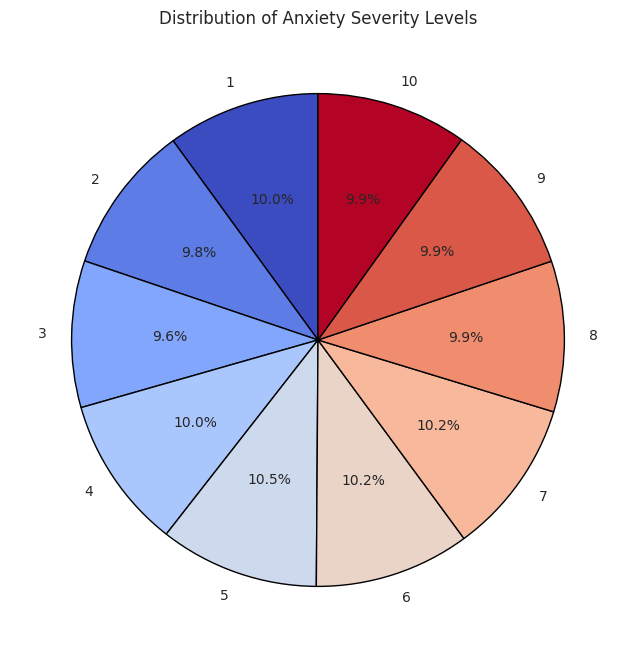

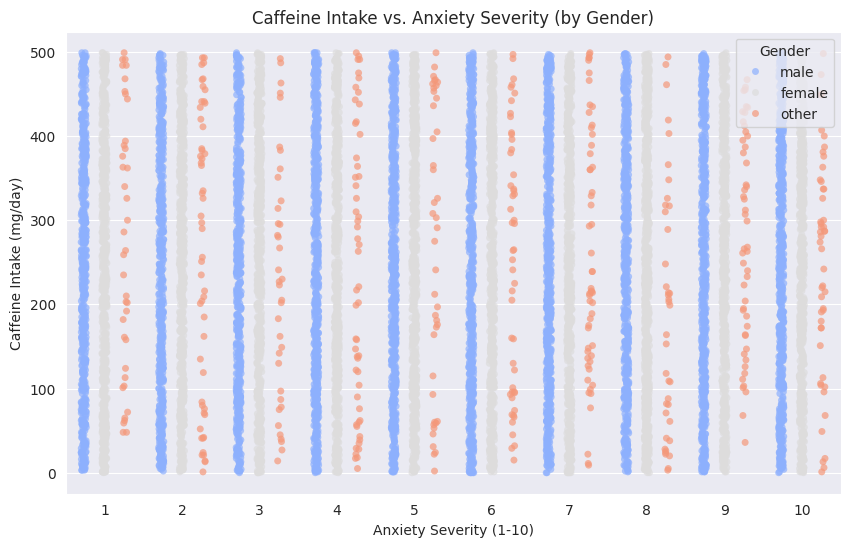

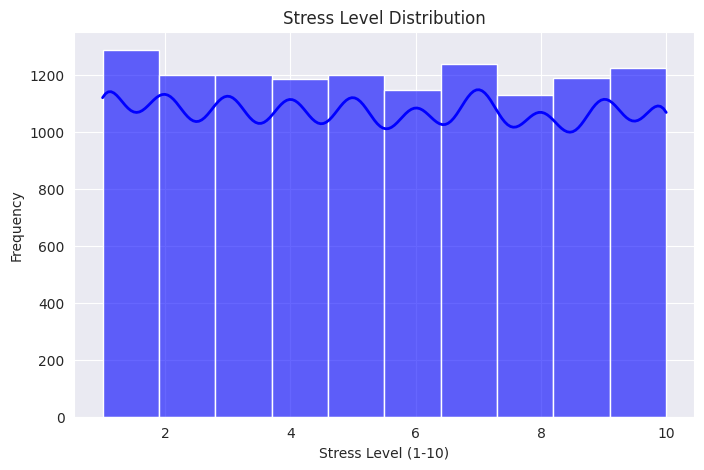

<ipython-input-24-68e9bb1f418e>:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gender")


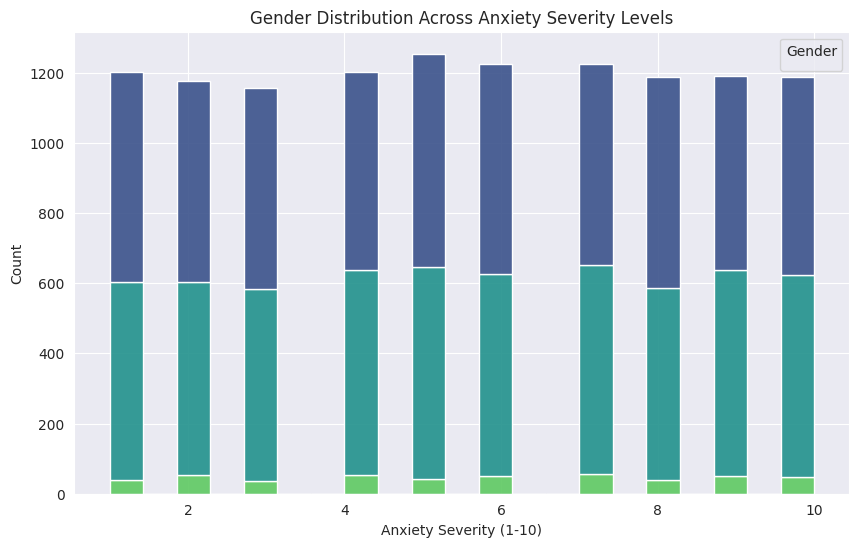

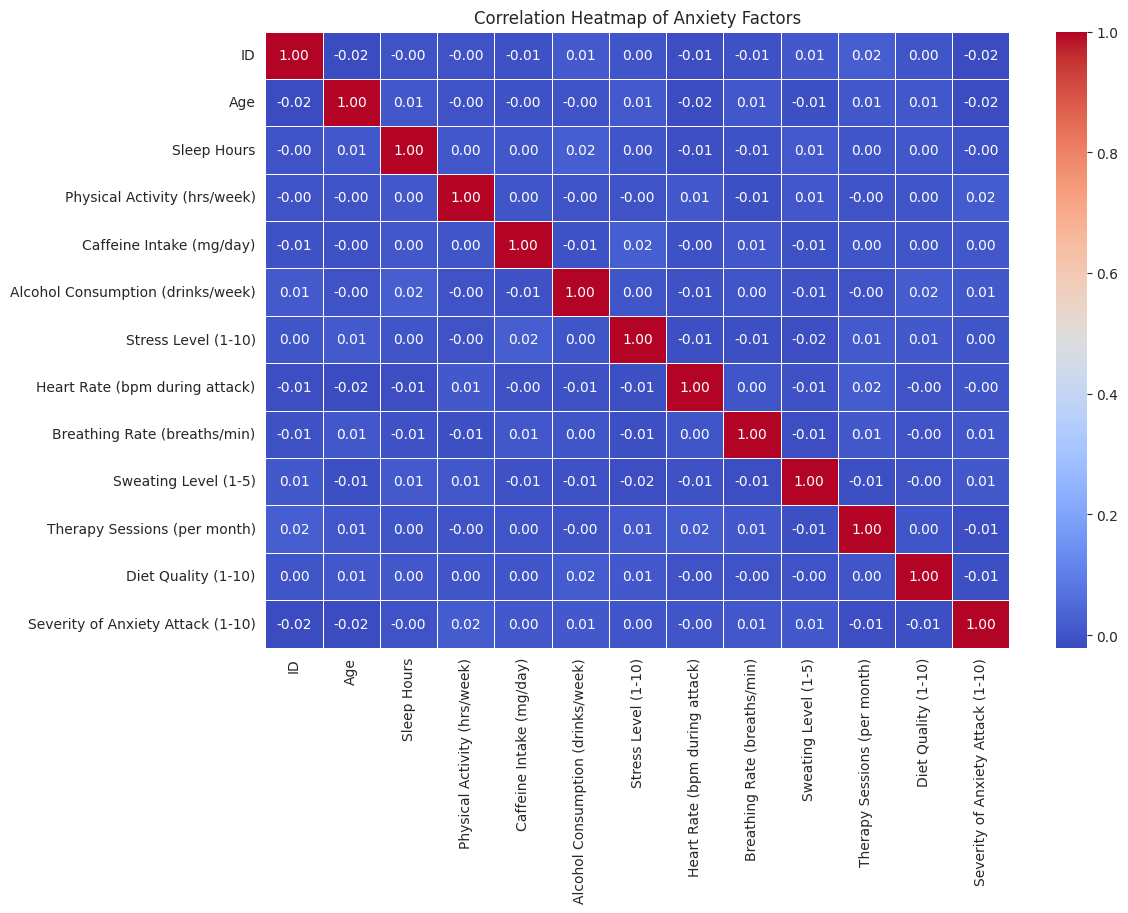

<ipython-input-24-68e9bb1f418e>:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_clean, x="Severity of Anxiety Attack (1-10)", y="Physical Activity (hrs/week)", ci=None, palette="dark:#5A9")
<ipython-input-24-68e9bb1f418e>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x="Severity of Anxiety Attack (1-10)", y="Physical Activity (hrs/week)", ci=None, palette="dark:#5A9")


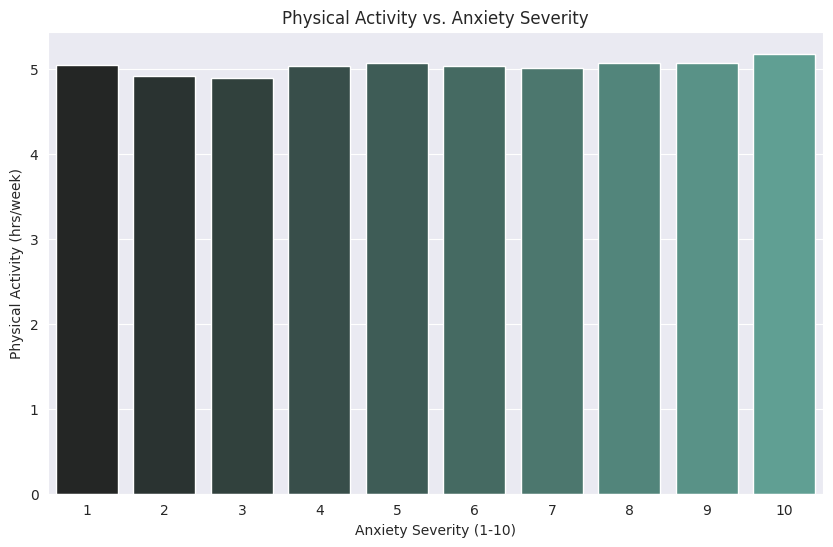

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

plt.figure(figsize=(8,8))
df_clean["Severity of Anxiety Attack (1-10)"].value_counts().sort_index().plot.pie(
    autopct='%1.1f%%', startangle=90, cmap="coolwarm", wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Anxiety Severity Levels")
plt.ylabel("")
plt.show()

plt.figure(figsize=(10,6))
sns.stripplot(data=df_clean, x="Severity of Anxiety Attack (1-10)", y="Caffeine Intake (mg/day)", hue="Gender",
              palette="coolwarm", alpha=0.7, jitter=True, dodge=True)
plt.title("Caffeine Intake vs. Anxiety Severity (by Gender)")
plt.xlabel("Anxiety Severity (1-10)")
plt.ylabel("Caffeine Intake (mg/day)")
plt.legend(title="Gender")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df_clean["Stress Level (1-10)"], bins=10, kde=True, color="blue", alpha=0.6, line_kws={'linewidth':2})
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=df_clean, x="Severity of Anxiety Attack (1-10)", hue="Gender", multiple="stack", palette="viridis", alpha=0.9)
plt.title("Gender Distribution Across Anxiety Severity Levels")
plt.xlabel("Anxiety Severity (1-10)")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

plt.figure(figsize=(12,8))
correlation_matrix = df_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Anxiety Factors")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=df_clean, x="Severity of Anxiety Attack (1-10)", y="Physical Activity (hrs/week)", ci=None, palette="dark:#5A9")
plt.title("Physical Activity vs. Anxiety Severity")
plt.xlabel("Anxiety Severity (1-10)")
plt.ylabel("Physical Activity (hrs/week)")
plt.show()


<ipython-input-25-5ced0c6091ac>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Occupation", data=df, order=df["Occupation"].value_counts().index, palette="viridis")
<ipython-input-25-5ced0c6091ac>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Sleep Hours", data=df, palette="coolwarm")
<ipython-input-25-5ced0c6091ac>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Family History of Anxiety", data=df, palette="Set2")


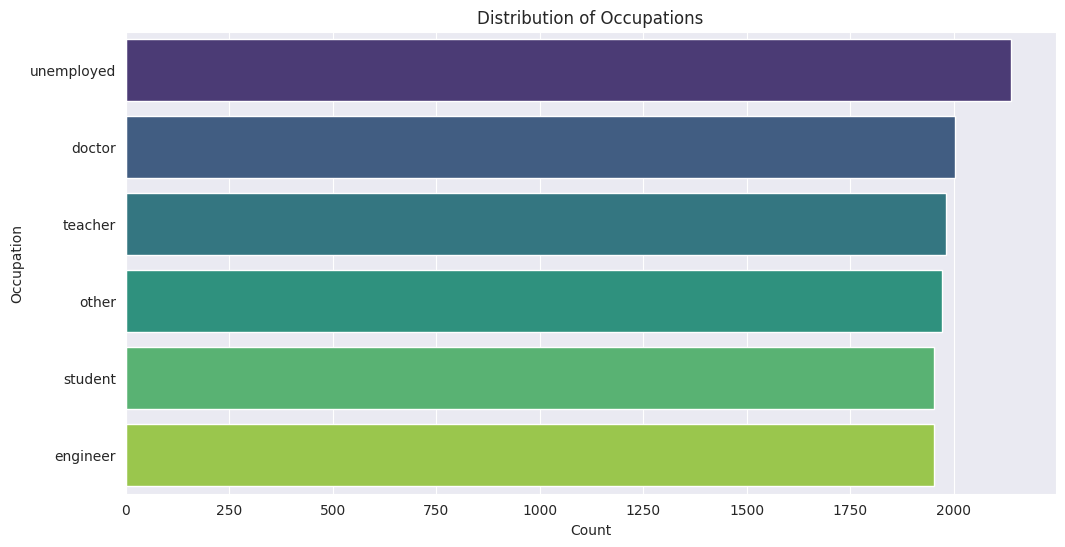

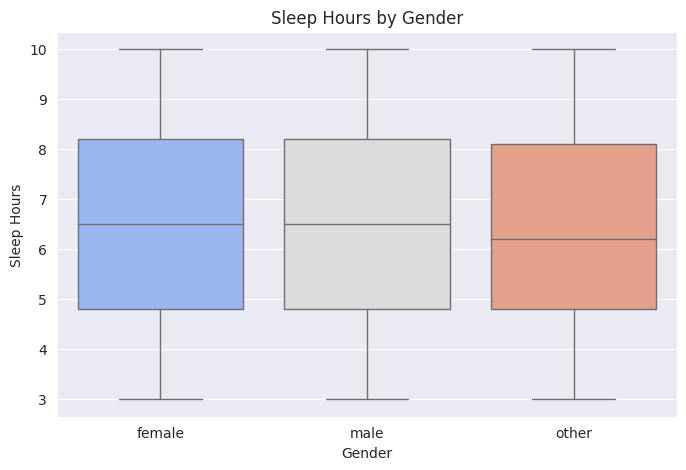

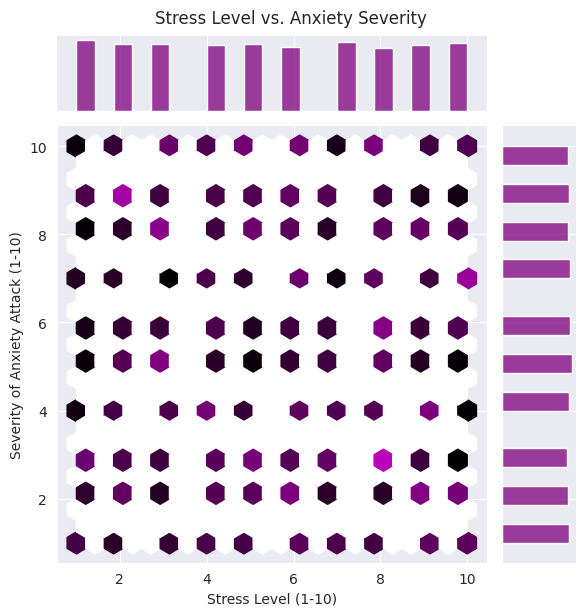

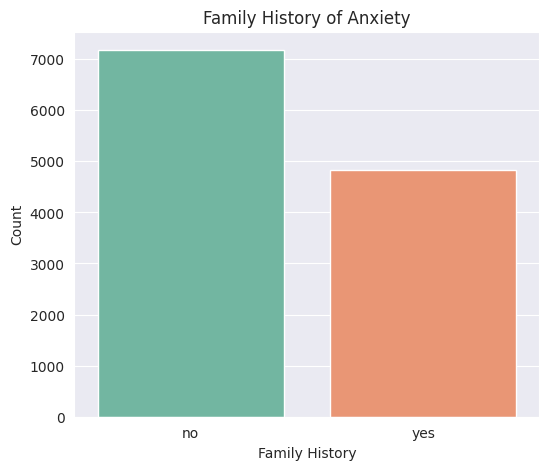

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

figures = []

plt.figure(figsize=(12, 6))
sns.countplot(y="Occupation", data=df, order=df["Occupation"].value_counts().index, palette="viridis")
plt.title("Distribution of Occupations")
plt.xlabel("Count")
plt.ylabel("Occupation")
figures.append(plt.gcf())

plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="Sleep Hours", data=df, palette="coolwarm")
plt.title("Sleep Hours by Gender")
plt.xlabel("Gender")
plt.ylabel("Sleep Hours")
figures.append(plt.gcf())

sns.jointplot(x=df["Stress Level (1-10)"], y=df["Severity of Anxiety Attack (1-10)"], kind="hex", color="purple")
plt.suptitle("Stress Level vs. Anxiety Severity", y=1.02)
figures.append(plt.gcf())

plt.figure(figsize=(6, 5))
sns.countplot(x="Family History of Anxiety", data=df, palette="Set2")
plt.title("Family History of Anxiety")
plt.xlabel("Family History")
plt.ylabel("Count")
figures.append(plt.gcf())

# Show all plots
for fig in figures:
    plt.show(fig)

#**PCA**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
file_path = "/content/Clean_Anxiety-dataset.csv"
df_clean = pd.read_csv(file_path)

df_pca = df_clean.select_dtypes(include=['number']).copy()

pca_ready_file_path = "/content/Clean-dataset.csv"
df_pca.to_csv(pca_ready_file_path, index=False)

pca_ready_file_path

'/content/Clean-dataset.csv'

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_pca_scaled = pd.DataFrame(scaler.fit_transform(df_pca), columns=df_pca.columns)

normalized_file_path = "/content/PCA_normalized_dataset.csv"
df_pca_scaled.to_csv(normalized_file_path, index=False)

normalized_file_path

'/content/PCA_normalized_dataset.csv'

In [ ]:
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(df_pca_scaled)

pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(df_pca_scaled)

df_pca_2d = pd.DataFrame(pca_2d_result, columns=['PC1', 'PC2'])
df_pca_3d = pd.DataFrame(pca_3d_result, columns=['PC1', 'PC2', 'PC3'])

pca_2d_file_path = "/content/PCA_2D_dataset.csv"
pca_3d_file_path = "/content/PCA_3D_dataset.csv"

df_pca_2d.to_csv(pca_2d_file_path, index=False)
df_pca_3d.to_csv(pca_3d_file_path, index=False)

pca_2d_file_path, pca_3d_file_path

('/content/PCA_2D_dataset.csv', '/content/PCA_3D_dataset.csv')

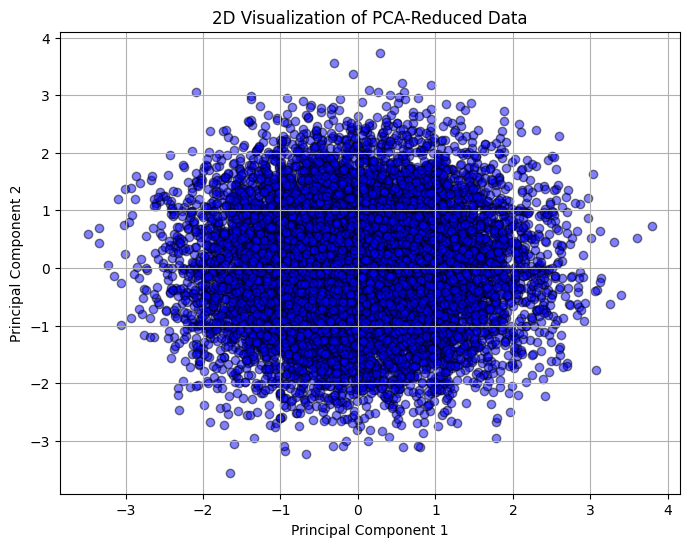

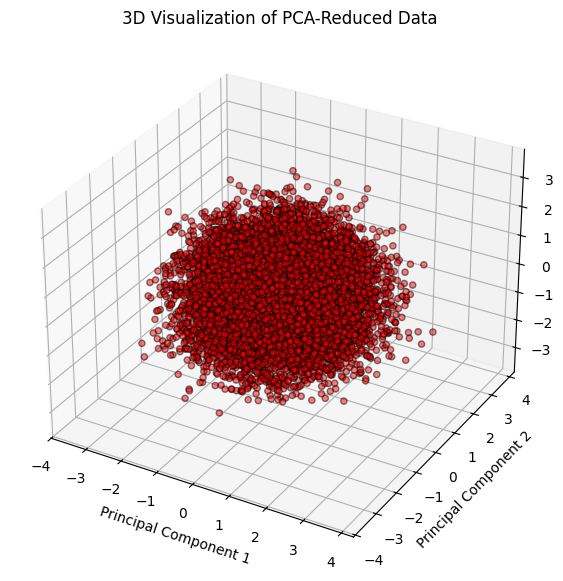

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(8,6))
plt.scatter(df_pca_2d["PC1"], df_pca_2d["PC2"], alpha=0.5, c='blue', edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D Visualization of PCA-Reduced Data")
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d["PC1"], df_pca_3d["PC2"], df_pca_3d["PC3"], alpha=0.5, c='red', edgecolors='k')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Visualization of PCA-Reduced Data")
plt.show()

In [ ]:
explained_variance_2d = pca_2d.explained_variance_ratio_
cumulative_variance_2d = explained_variance_2d.sum()

explained_variance_2d, cumulative_variance_2d

(array([0.08136276, 0.08039037]), 0.16175312610093184)

In [ ]:
print("Explained Variance Ratio for 2 Components:", explained_variance_2d)
print("Total Variance Retained in 2D PCA:", cumulative_variance_2d * 100, "%")

Explained Variance Ratio for 2 Components: [0.08136276 0.08039037]
Total Variance Retained in 2D PCA: 16.175312610093183 %


In [ ]:
explained_variance_3d = pca_3d.explained_variance_ratio_
cumulative_variance_3d = explained_variance_3d.sum()

explained_variance_3d, cumulative_variance_3d

(array([0.08136276, 0.08039037, 0.07964613]), 0.24139925885101413)

In [ ]:
print("Explained Variance Ratio for 3 Components:", explained_variance_3d)
print("Total Variance Retained in 3D PCA:", cumulative_variance_3d * 100, "%")

Explained Variance Ratio for 3 Components: [0.08136276 0.08039037 0.07964613]
Total Variance Retained in 3D PCA: 24.139925885101412 %


In [ ]:
import numpy as np

pca_full = PCA().fit(df_pca_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"To retain at least 95% of the total variance, the optimal number of principal components required is: {num_components_95}")

To retain at least 95% of the total variance, the optimal number of principal components required is: 13


In [ ]:
pca_13d = PCA(n_components=13)
pca_13d_result = pca_13d.fit_transform(df_pca_scaled)

df_pca_13d = pd.DataFrame(pca_13d_result, columns=[f'PC{i+1}' for i in range(13)])

pca_13d_file_path = "/content/PCA_13D_dataset.csv"
df_pca_13d.to_csv(pca_13d_file_path, index=False)

pca_13d_file_path

'/content/PCA_13D_dataset.csv'

In [ ]:
eigenvalues = pca_13d.explained_variance_

top_three_eigenvalues = eigenvalues[:3]

top_three_eigenvalues
print("Top Three Eigenvalues:", pca_13d.explained_variance_[:3])

Top Three Eigenvalues: [1.057804   1.04516189 1.03548602]


# **Clustering**

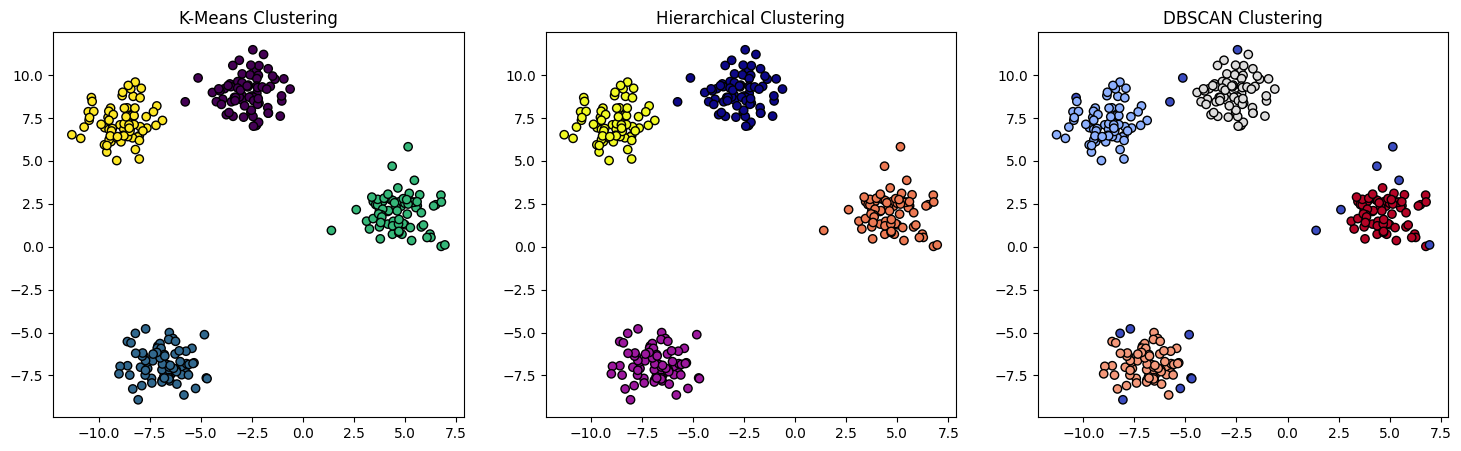

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X)

dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
ax[0].set_title("K-Means Clustering")

ax[1].scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='plasma', edgecolors='k')
ax[1].set_title("Hierarchical Clustering")

ax[2].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='coolwarm', edgecolors='k')
ax[2].set_title("DBSCAN Clustering")

plt.show()


In [ ]:
df_clean = pd.read_csv(file_path)

label_column = df_clean.columns[-1]

df_labels = df_clean[label_column].copy()

df_clustering = df_clean.drop(columns=[label_column])

clustering_data_path = "/content/Clustering_Dataset.csv"
labels_data_path = "/content/Labels_Dataset.csv"

df_clustering.to_csv(clustering_data_path, index=False)
df_labels.to_csv(labels_data_path, index=False)

clustering_data_path, labels_data_path

('/content/Clustering_Dataset.csv', '/content/Labels_Dataset.csv')

In [ ]:
df_clustering.head()
df_labels.head()

0    10
1     8
2     5
3     8
4     1
Name: Severity of Anxiety Attack (1-10), dtype: int64

In [ ]:
file_path = "/content/Clean-dataset.csv"

df_clean = pd.read_csv(file_path)

label_column = df_clean.columns[-1]

df_labels = df_clean[label_column].copy()

df_clustering = df_clean.drop(columns=[label_column])


df_clustering_numeric = df_clustering.select_dtypes(include=['number']).copy()


quantitative_data_path = "/content/Quantitative_Clustering_Dataset.csv"
df_clustering_numeric.to_csv(quantitative_data_path, index=False)


quantitative_data_path

'/content/Quantitative_Clustering_Dataset.csv'

In [ ]:
df_clustering_numeric.info()
df_clustering_numeric.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Sleep Hours                        12000 non-null  float64
 3   Physical Activity (hrs/week)       12000 non-null  float64
 4   Caffeine Intake (mg/day)           12000 non-null  int64  
 5   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 6   Stress Level (1-10)                12000 non-null  int64  
 7   Heart Rate (bpm during attack)     12000 non-null  int64  
 8   Breathing Rate (breaths/min)       12000 non-null  int64  
 9   Sweating Level (1-5)               12000 non-null  int64  
 10  Therapy Sessions (per month)       12000 non-null  int64  
 11  Diet Quality (1-10)                12000 non-null  int

ID  Age  Sleep Hours  Physical Activity (hrs/week)  \
0   1   56          9.6                           8.3   
1   2   46          6.4                           7.3   
2   3   32          6.9                           1.0   
3   4   60          9.2                           3.7   
4   5   25          9.2                           2.5   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  \
0                       175                                  6   
1                        97                                  6   
2                       467                                 14   
3                       471                                 16   
4                       364                                  2   

   Stress Level (1-10)  Heart Rate (bpm during attack)  \
0                    4                             145   
1                    3                             143   
2                    2                              60   
3                    6                              94   
4                    7                             152   

   Breathing Rate (breaths/min)  Sweating Level (1-5)  \
0                            33                     3   
1                            18                     5   
2                            34                     1   
3                            19                     1   
4                            15                     4   

   Therapy Sessions (per month)  Diet Quality (1-10)  
0                             4                    9  
1                             0                    9  
2                             7                   10  
3                             4                    5  
4                             0                    1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clustering_scaled = pd.DataFrame(scaler.fit_transform(df_clustering_numeric), columns=df_clustering_numeric.columns)

normalized_data_path = "/content/Normalized_Clustering_Dataset.csv"
df_clustering_scaled.to_csv(normalized_data_path, index=False)

normalized_data_path

'/content/Normalized_Clustering_Dataset.csv'

In [ ]:
df_clustering_scaled.describe()

ID           Age   Sleep Hours  Physical Activity (hrs/week)  \
count  12000.000000  1.200000e+04  1.200000e+04                  1.200000e+04   
mean       0.000000  1.752672e-16 -2.306303e-16                 -1.817805e-16   
std        1.000042  1.000042e+00  1.000042e+00                  1.000042e+00   
min       -1.731906 -1.704686e+00 -1.728533e+00                 -1.741468e+00   
25%       -0.865953 -8.882209e-01 -8.351444e-01                 -8.760806e-01   
50%        0.000000  2.467950e-03  8.611271e-03                 -1.069330e-02   
75%        0.865953  8.931568e-01  8.523670e-01                  8.633479e-01   
max        1.731906  1.709622e+00  1.745755e+00                  1.720081e+00   

       Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  \
count              1.200000e+04                       1.200000e+04   
mean               9.444297e-17                      -3.552714e-18   
std                1.000042e+00                       1.000042e+00   
min               -1.707463e+00                      -1.645455e+00   
25%               -8.630619e-01                      -7.787723e-01   
50%               -1.866046e-02                      -8.542604e-02   
75%                8.603475e-01                       9.545934e-01   
max                1.746277e+00                       1.647940e+00   

       Stress Level (1-10)  Heart Rate (bpm during attack)  \
count         1.200000e+04                    1.200000e+04   
mean         -1.509903e-17                    4.973799e-17   
std           1.000042e+00                    1.000042e+00   
min          -1.540258e+00                   -1.706595e+00   
25%          -8.499074e-01                   -8.733881e-01   
50%          -1.595572e-01                   -1.144942e-02   
75%           8.759681e-01                    8.504892e-01   
max           1.566318e+00                    1.712428e+00   

       Breathing Rate (breaths/min)  Sweating Level (1-5)  \
count                  1.200000e+04          1.200000e+04   
mean                  -6.513308e-18         -1.059893e-16   
std                    1.000042e+00          1.000042e+00   
min                   -1.663999e+00         -1.405108e+00   
25%                   -9.223747e-01         -6.981058e-01   
50%                   -5.714628e-02          8.896445e-03   
75%                    8.080822e-01          7.158987e-01   
max                    1.673311e+00          1.422901e+00   

       Therapy Sessions (per month)  Diet Quality (1-10)  
count                  1.200000e+04         1.200000e+04  
mean                  -1.089499e-16        -1.204962e-16  
std                    1.000042e+00         1.000042e+00  
min                   -1.576619e+00        -1.568403e+00  
25%                   -8.787554e-01        -8.709218e-01  
50%                    1.680397e-01        -1.734404e-01  
75%                    8.659031e-01         8.727818e-01  
max                    1.563767e+00         1.570263e+00

In [ ]:
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(df_clustering_scaled)

df_pca_3d = pd.DataFrame(pca_3d_result, columns=['PC1', 'PC2', 'PC3'])

explained_variance_3d = pca_3d.explained_variance_ratio_
cumulative_variance_3d = explained_variance_3d.sum()

pca_3d_data_path = "/content/PCA_3D_Clustering_Dataset.csv"
df_pca_3d.to_csv(pca_3d_data_path, index=False)

explained_variance_3d, cumulative_variance_3d

(array([0.08752622, 0.08707644, 0.0859238 ]), 0.26052646998576756)

In [ ]:
print("Explained Variance Ratio for 3 Components:", explained_variance_3d)
print("Total Variance Retained in 3D PCA:", cumulative_variance_3d * 100, "%")

Explained Variance Ratio for 3 Components: [0.08752622 0.08707644 0.0859238 ]
Total Variance Retained in 3D PCA: 26.052646998576755 %


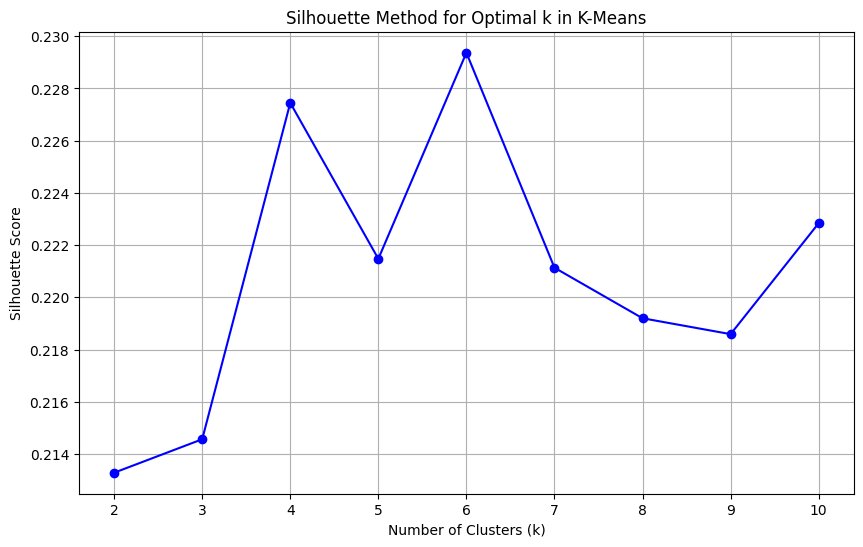

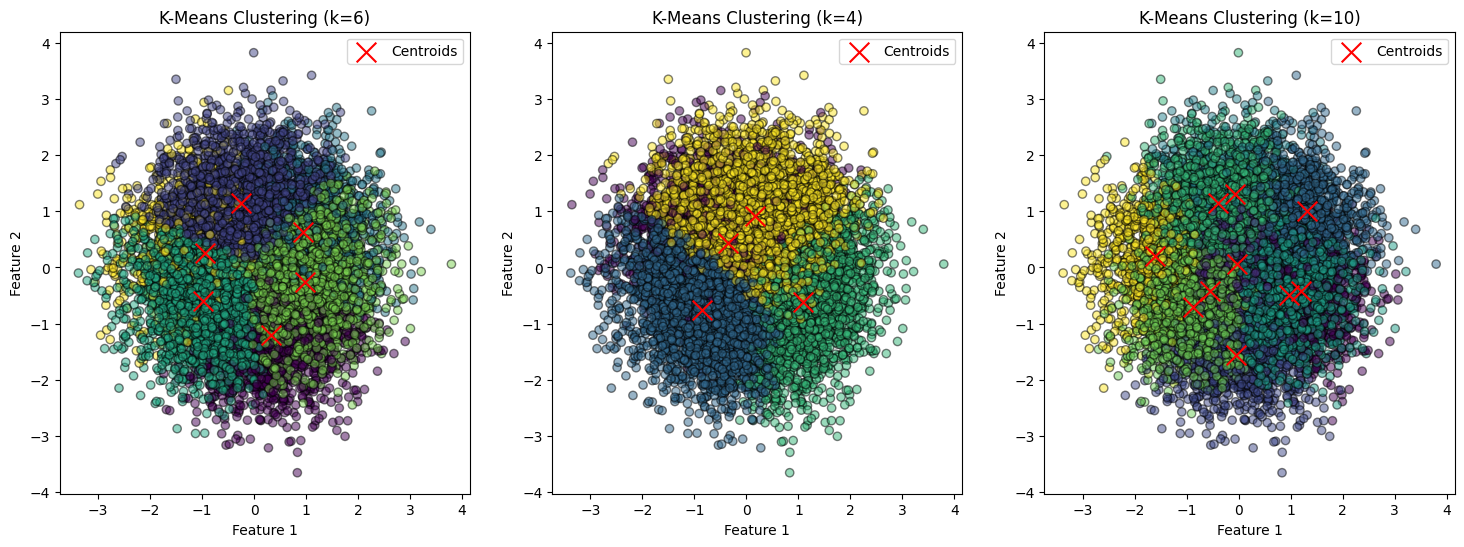

[(6, 0.22936980114055458), (4, 0.22744919082516601), (10, 0.22284016504831386)]

In [ ]:
file_path = "/content/PCA_3D_Clustering_Dataset.csv"
df_clustering_scaled = pd.read_csv(file_path)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_clustering_scaled)
    score = silhouette_score(df_clustering_scaled, labels)
    silhouette_scores.append(score)

best_k_values = sorted(zip(k_values, silhouette_scores), key=lambda x: x[1], reverse=True)[:3]

plt.figure(figsize=(10,6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k in K-Means")
plt.grid(True)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (k, _) in enumerate(best_k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_clustering_scaled)
    centroids = kmeans.cluster_centers_

    axes[i].scatter(df_clustering_scaled.iloc[:, 0], df_clustering_scaled.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors='k')
    axes[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")
    axes[i].set_title(f"K-Means Clustering (k={k})")
    axes[i].legend()

plt.show()

best_k_values


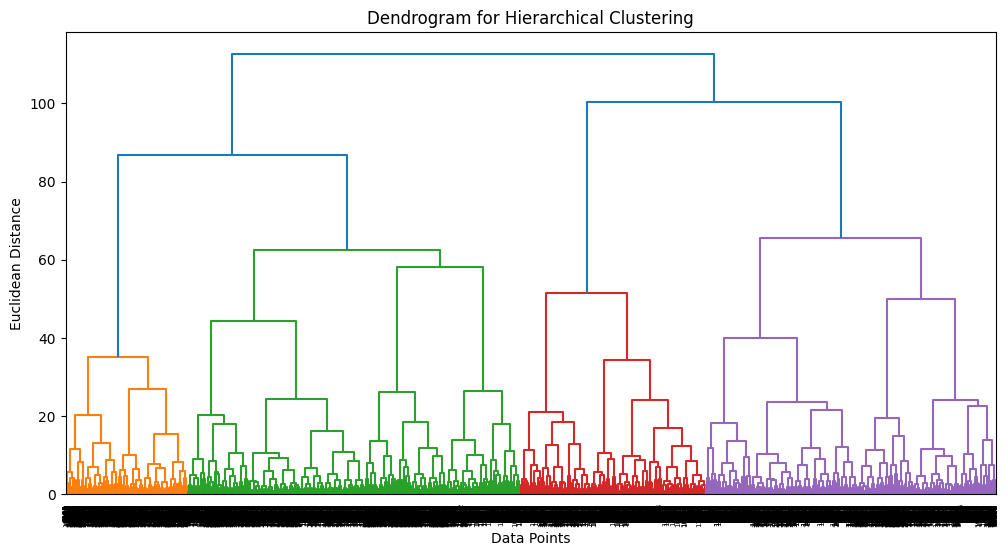

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

file_path = "/content/PCA_3D_Clustering_Dataset.csv"
df_clustering_scaled = pd.read_csv(file_path)

linkage_method = 'ward'

plt.figure(figsize=(12, 6))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
sch.dendrogram(sch.linkage(df_clustering_scaled, method=linkage_method))
plt.show()

agglo_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage=linkage_method)
hierarchical_labels = agglo_clustering.fit_predict(df_clustering_scaled)


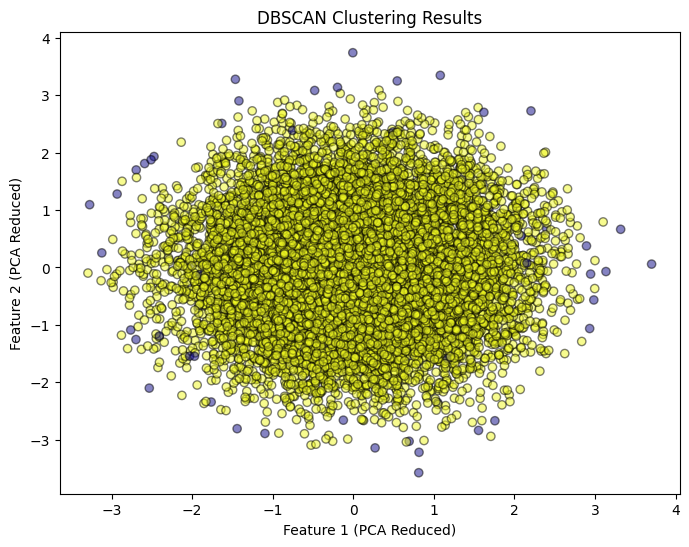

{-1: 52, 0: 11948}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

file_path = "/content/PCA_3D_Clustering_Dataset.csv"
df_clean = pd.read_csv(file_path)

df_selected = df_clean.iloc[0:12000, 0:12]

df_clustering_numeric = df_selected.select_dtypes(include=['number']).copy()

scaler = StandardScaler()
df_clustering_scaled = pd.DataFrame(scaler.fit_transform(df_clustering_numeric), columns=df_clustering_numeric.columns)

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Default parameters, can be tuned
dbscan_labels = dbscan.fit_predict(df_clustering_scaled)

plt.figure(figsize=(8,6))
plt.scatter(df_clustering_scaled.iloc[:, 0], df_clustering_scaled.iloc[:, 1], c=dbscan_labels, cmap='plasma', alpha=0.5, edgecolors='k')
plt.xlabel("Feature 1 (PCA Reduced)" if 'PC1' in df_clustering_scaled.columns else "Feature 1")
plt.ylabel("Feature 2 (PCA Reduced)" if 'PC2' in df_clustering_scaled.columns else "Feature 2")
plt.title("DBSCAN Clustering Results")
plt.show()

unique_clusters, cluster_counts = np.unique(dbscan_labels, return_counts=True)
dict(zip(unique_clusters, cluster_counts))

# **ARM**

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


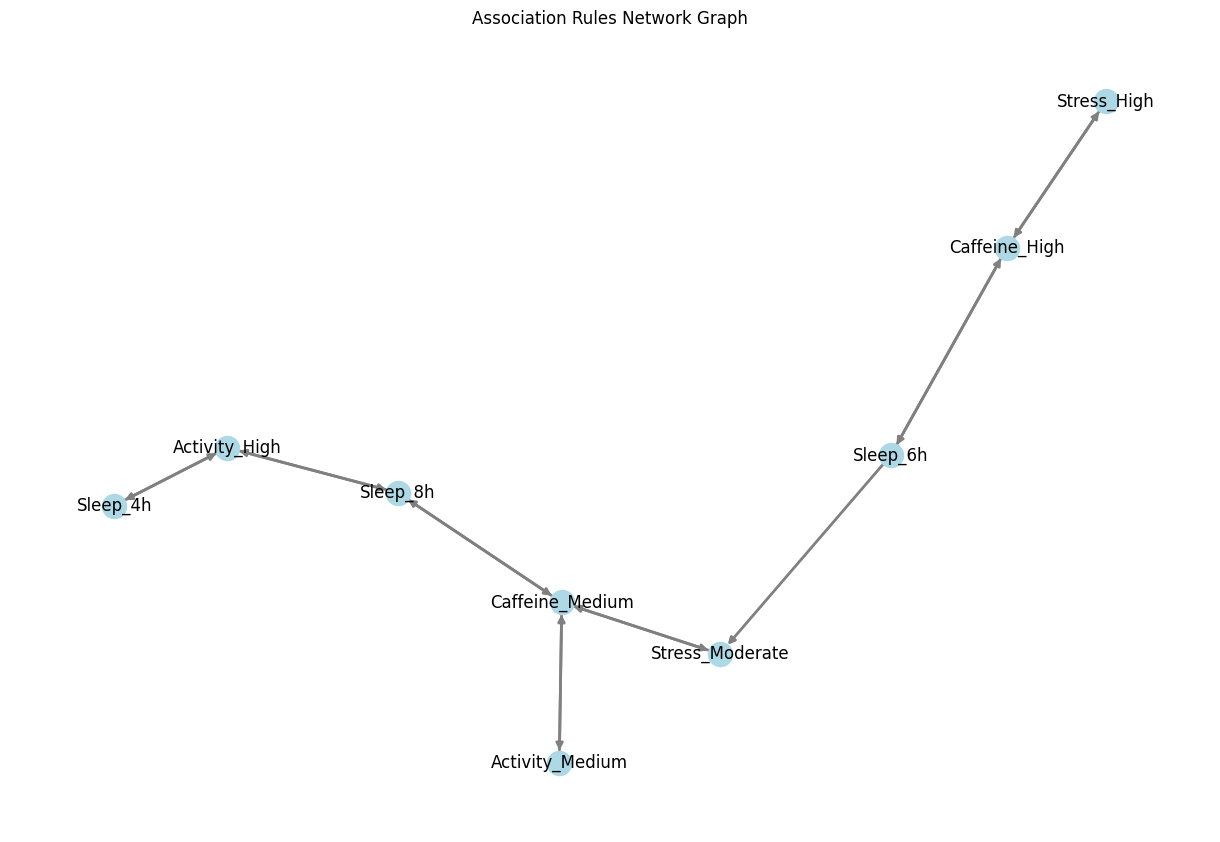


Top 15 Rules by Support:
           antecedents        consequents  antecedent support  \
6     (Activity_High)      (Stress_High)            0.407250   
7       (Stress_High)    (Activity_High)            0.398333   
0     (Activity_High)    (Caffeine_High)            0.407250   
1     (Caffeine_High)    (Activity_High)            0.393917   
19      (Stress_High)    (Caffeine_High)            0.398333   
18    (Caffeine_High)      (Stress_High)            0.393917   
25  (Caffeine_Medium)  (Stress_Moderate)            0.400583   
24  (Stress_Moderate)  (Caffeine_Medium)            0.394333   
14  (Activity_Medium)  (Caffeine_Medium)            0.302250   
15  (Caffeine_Medium)  (Activity_Medium)            0.400583   
2     (Activity_High)         (Sleep_4h)            0.407250   
3          (Sleep_4h)    (Activity_High)            0.289583   
16    (Caffeine_High)         (Sleep_6h)            0.393917   
17         (Sleep_6h)    (Caffeine_High)            0.286833   
20  (Caffeine

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import matplotlib.pyplot as plt

file_path = "Clean_Anxiety-dataset.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip().str.lower()

columns = ["age", "sleep hours", "physical activity (hrs/week)", "caffeine intake (mg/day)", "stress level (1-10)"]
df_filtered = df[columns]

def bin_age(age):
    return "Age_" + str((age // 10) * 10) + "s"

def bin_sleep(hours):
    return "Sleep_" + str(int(hours // 2) * 2) + "h"

def bin_activity(hours):
    return "Activity_" + ("None" if hours == 0 else "Low" if hours < 3 else "Medium" if hours < 6 else "High")

def bin_caffeine(mg):
    return "Caffeine_" + ("Low" if mg < 100 else "Medium" if mg < 300 else "High")

def bin_stress(level):
    return "Stress_" + ("Low" if level < 3 else "Moderate" if level < 7 else "High")

transactions = df_filtered.apply(lambda row: [
    bin_age(row["age"]),
    bin_sleep(row["sleep hours"]),
    bin_activity(row["physical activity (hrs/week)"]),
    bin_caffeine(row["caffeine intake (mg/day)"]),
    bin_stress(row["stress level (1-10)"])
], axis=1)

transaction_df = pd.DataFrame(transactions.tolist())
transaction_df.to_csv("transactions_dataset.csv", index=False)
one_hot_encoded = transaction_df.apply(lambda x: pd.Series(x).value_counts(), axis=1).fillna(0)

min_support = 0.1
frequent_itemsets = apriori(one_hot_encoded, min_support=min_support, use_colnames=True, max_len=3)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

top_15_support = rules.sort_values(by="support", ascending=False).head(15)
top_15_confidence = rules.sort_values(by="confidence", ascending=False).head(15)
top_15_lift = rules.sort_values(by="lift", ascending=False).head(15)

def draw_graph(rules_subset):
    G = nx.DiGraph()
    for _, rule in rules_subset.iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        for a in antecedents:
            for c in consequents:
                G.add_edge(a, c, weight=rule['lift'])

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=2.0)
    plt.title("Association Rules Network Graph")
    plt.show()

draw_graph(top_15_lift)

print("\nTop 15 Rules by Support:\n", top_15_support)
print("\nTop 15 Rules by Confidence:\n", top_15_confidence)
print("\nTop 15 Rules by Lift:\n", top_15_lift)

# **Naive Bayes**

Data preprocessing

In [ ]:
# ✅ Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix

# ✅ Step 2: Load and Prepare Dataset (Data Processing Block)
df = pd.read_csv("/content/Clean_Anxiety-dataset - Clean-dataset.csv.csv")
df['severity_binary'] = df['Severity of Anxiety Attack (1-10)'].apply(lambda x: 1 if x >= 6 else 0)

# Encode categorical features
binary_cols = ['Gender', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event', 'Smoking']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

In [ ]:
# ✅ Step 3: Split and Save Data (Train-Test Split Block)
X = df.drop(columns=['Severity of Anxiety Attack (1-10)', 'severity_binary'])
y = df['severity_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Save datasets for inspection
X_train.to_csv("X_train.csv-nb", index=False)
X_test.to_csv("X_test.csv-nb", index=False)
y_train.to_csv("y_train.csv-nb", index=False)
y_test.to_csv("y_test.csv-nb", index=False)

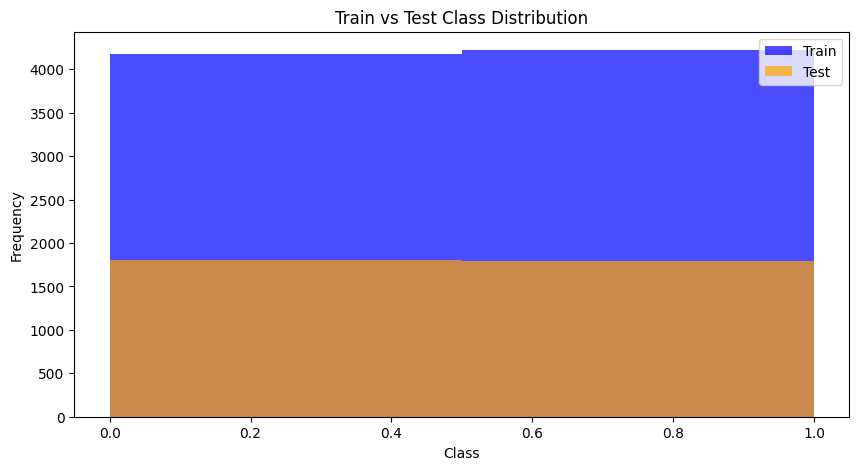

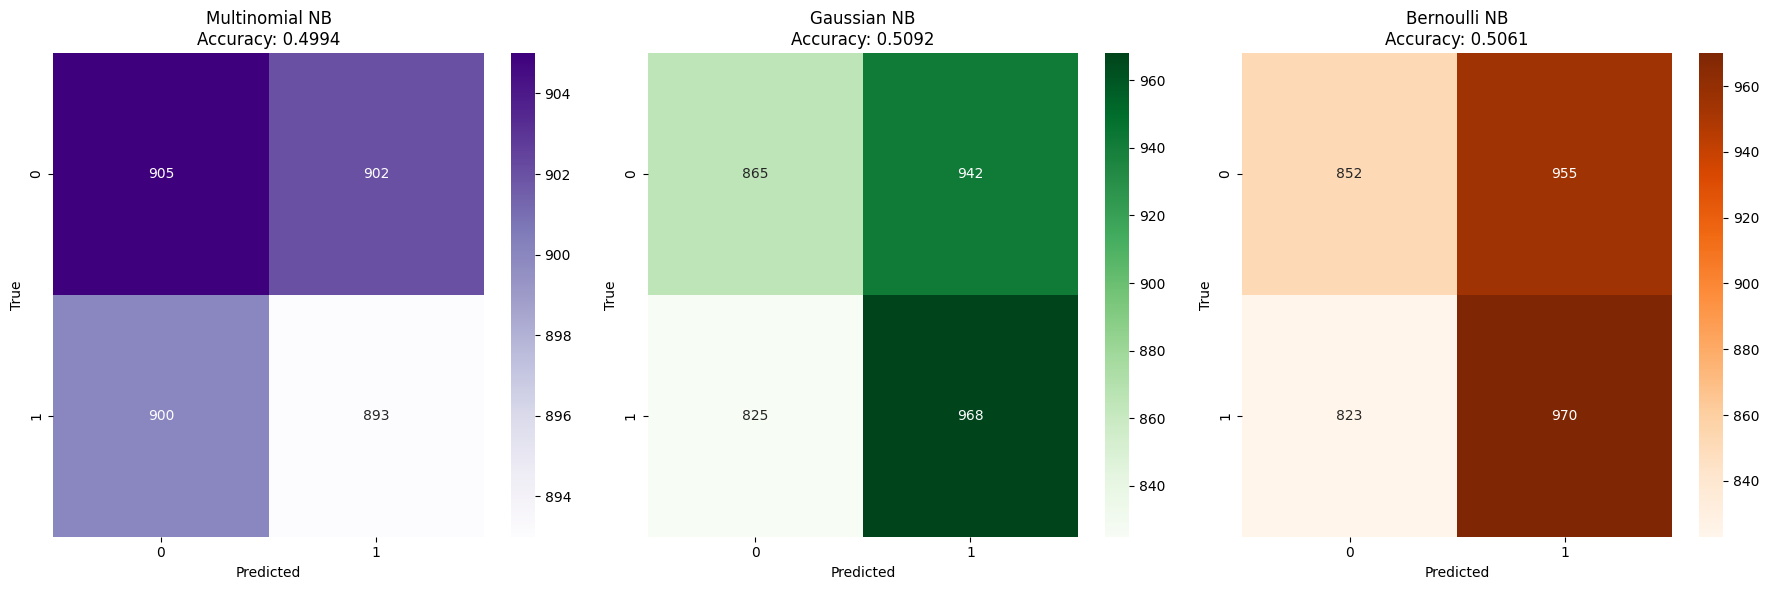

In [ ]:
# ✅ Step 4: Visualize Train vs Test Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(y_train, bins=2, alpha=0.7, label='Train', color='blue')
plt.hist(y_test, bins=2, alpha=0.7, label='Test', color='orange')
plt.legend()
plt.title("Train vs Test Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# ✅ Step 5: Multinomial Naive Bayes
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')
X_train_mnb = X_train_num - X_train_num.min() + 1e-5
X_test_mnb = X_test_num - X_test_num.min() + 1e-5

mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train)
y_pred_mnb = mnb.predict(X_test_mnb)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

# ✅ Step 6: Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# ✅ Step 7: Bernoulli Naive Bayes
X_train_bern = X_train_num.apply(lambda x: (x > x.mean()).astype(int))
X_test_bern = X_test_num.apply(lambda x: (x > x.mean()).astype(int))

bnb = BernoulliNB()
bnb.fit(X_train_bern, y_train)
y_pred_bnb = bnb.predict(X_test_bern)
acc_bnb = accuracy_score(y_test, y_pred_bnb)
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

# ✅ Step 8: Plot Confusion Matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Purples', ax=ax[0])
ax[0].set_title(f"Multinomial NB\nAccuracy: {acc_mnb:.4f}")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("True")

sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title(f"Gaussian NB\nAccuracy: {acc_gnb:.4f}")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("True")

sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Oranges', ax=ax[2])
ax[2].set_title(f"Bernoulli NB\nAccuracy: {acc_bnb:.4f}")
ax[2].set_xlabel("Predicted")
ax[2].set_ylabel("True")

plt.tight_layout()
plt.show()

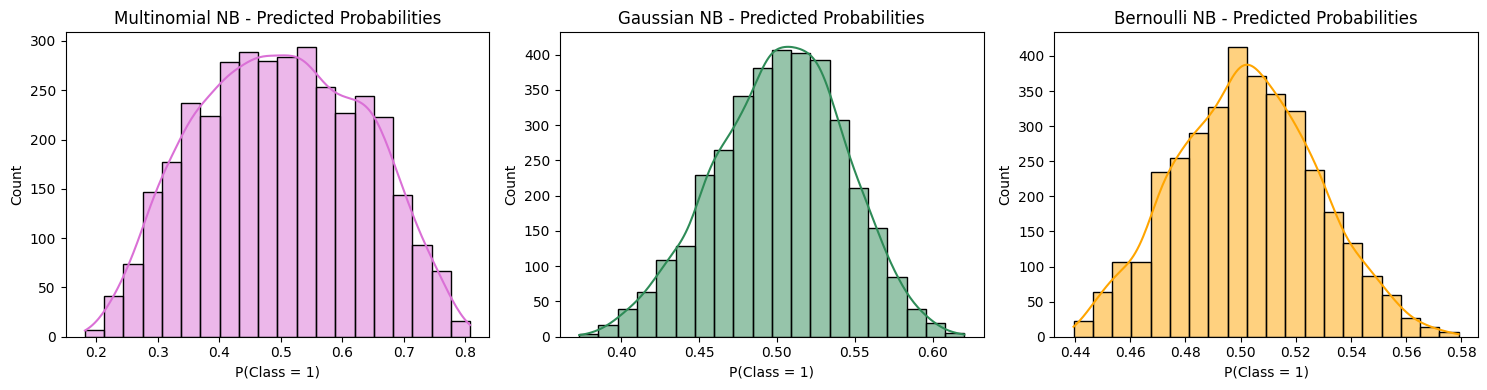

In [ ]:
# Plot predicted probability distributions for Class 1
probs_mnb = mnb.predict_proba(X_test_mnb)[:, 1]
probs_gnb = gnb.predict_proba(X_test)[:, 1]
probs_bnb = bnb.predict_proba(X_test_bern)[:, 1]

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(probs_mnb, bins=20, kde=True, color='orchid')
plt.title("Multinomial NB - Predicted Probabilities")
plt.xlabel("P(Class = 1)")

plt.subplot(1, 3, 2)
sns.histplot(probs_gnb, bins=20, kde=True, color='seagreen')
plt.title("Gaussian NB - Predicted Probabilities")
plt.xlabel("P(Class = 1)")

plt.subplot(1, 3, 3)
sns.histplot(probs_bnb, bins=20, kde=True, color='orange')
plt.title("Bernoulli NB - Predicted Probabilities")
plt.xlabel("P(Class = 1)")

plt.tight_layout()
plt.show()

<ipython-input-143-3a8c3bc9dc10>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")


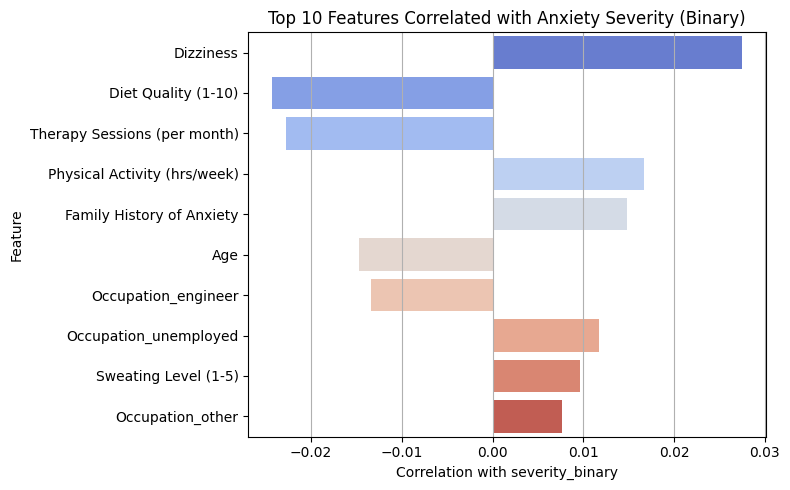

In [ ]:
import numpy as np

# Calculate correlation with target variable
correlations = X_train.corrwith(y_train).sort_values(key=abs, ascending=False)

# Select top 10 most correlated features
top_corr = correlations[:10]

# Plot the correlation values
plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.title("Top 10 Features Correlated with Anxiety Severity (Binary)")
plt.xlabel("Correlation with severity_binary")
plt.ylabel("Feature")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
# ✅ Print Accuracies of Naive Bayes Models
print("Naïve Bayes Model Accuracies:")
print(f"Multinomial NB Accuracy: {acc_mnb:.4f}")
print(f"Gaussian NB Accuracy:    {acc_gnb:.4f}")
print(f"Bernoulli NB Accuracy:   {acc_bnb:.4f}")


Naïve Bayes Model Accuracies:
Multinomial NB Accuracy: 0.4994
Gaussian NB Accuracy:    0.5092
Bernoulli NB Accuracy:   0.5061


# **Decision tree**

Data prep

In [ ]:
# ✅ Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

# ✅ Step 2: Load and Prepare Dataset (Data Processing Block)
df = pd.read_csv("/content/Clean_Anxiety-dataset - Clean-dataset.csv.csv")
df['severity_binary'] = df['Severity of Anxiety Attack (1-10)'].apply(lambda x: 1 if x >= 6 else 0)

# Encode categorical features
binary_cols = ['Gender', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event', 'Smoking']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# ✅ Step 3: Split and Save Data (Train-Test Split Block)
X = df.drop(columns=['Severity of Anxiety Attack (1-10)', 'severity_binary'])
y = df['severity_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Save datasets for inspection
X_train.to_csv("X_train.csv-dt", index=False)
X_test.to_csv("X_test.csv-dt", index=False)
y_train.to_csv("y_train.csv-dt", index=False)
y_test.to_csv("y_test.csv-dt", index=False)

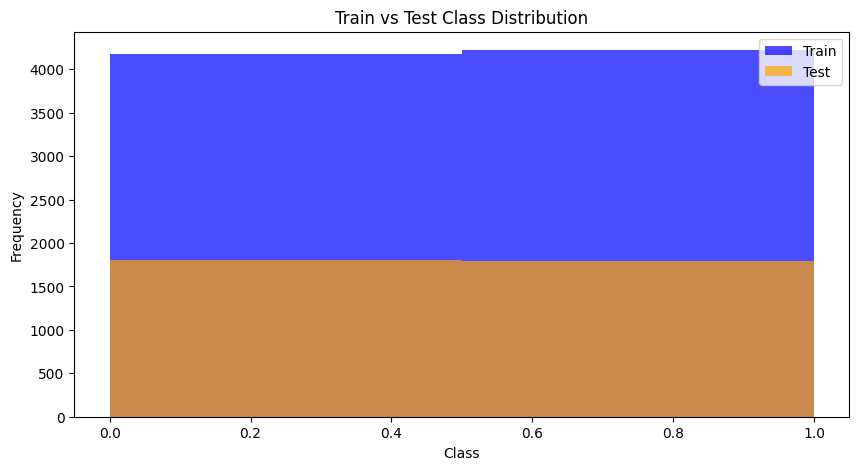

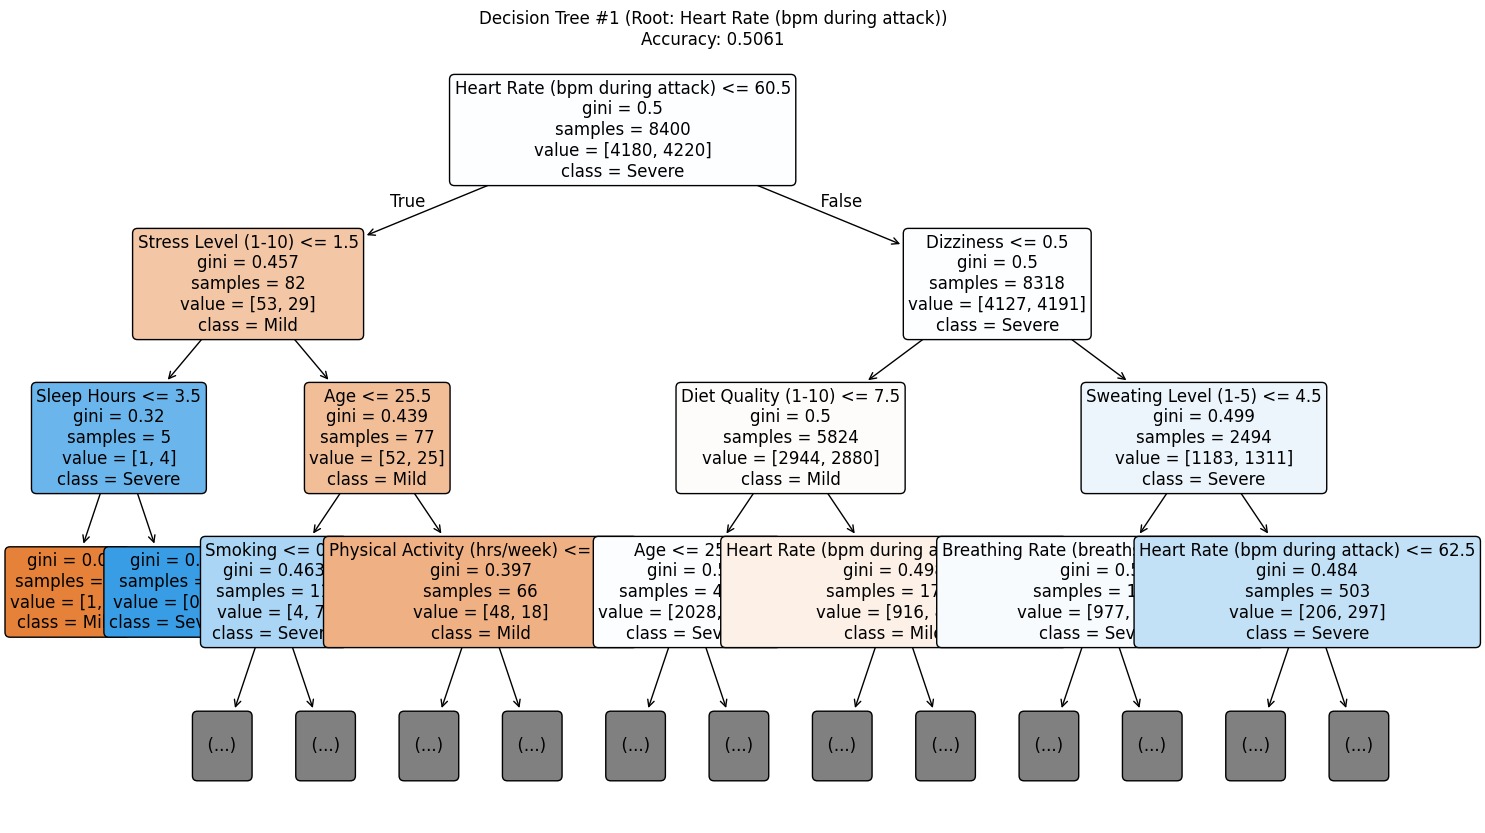

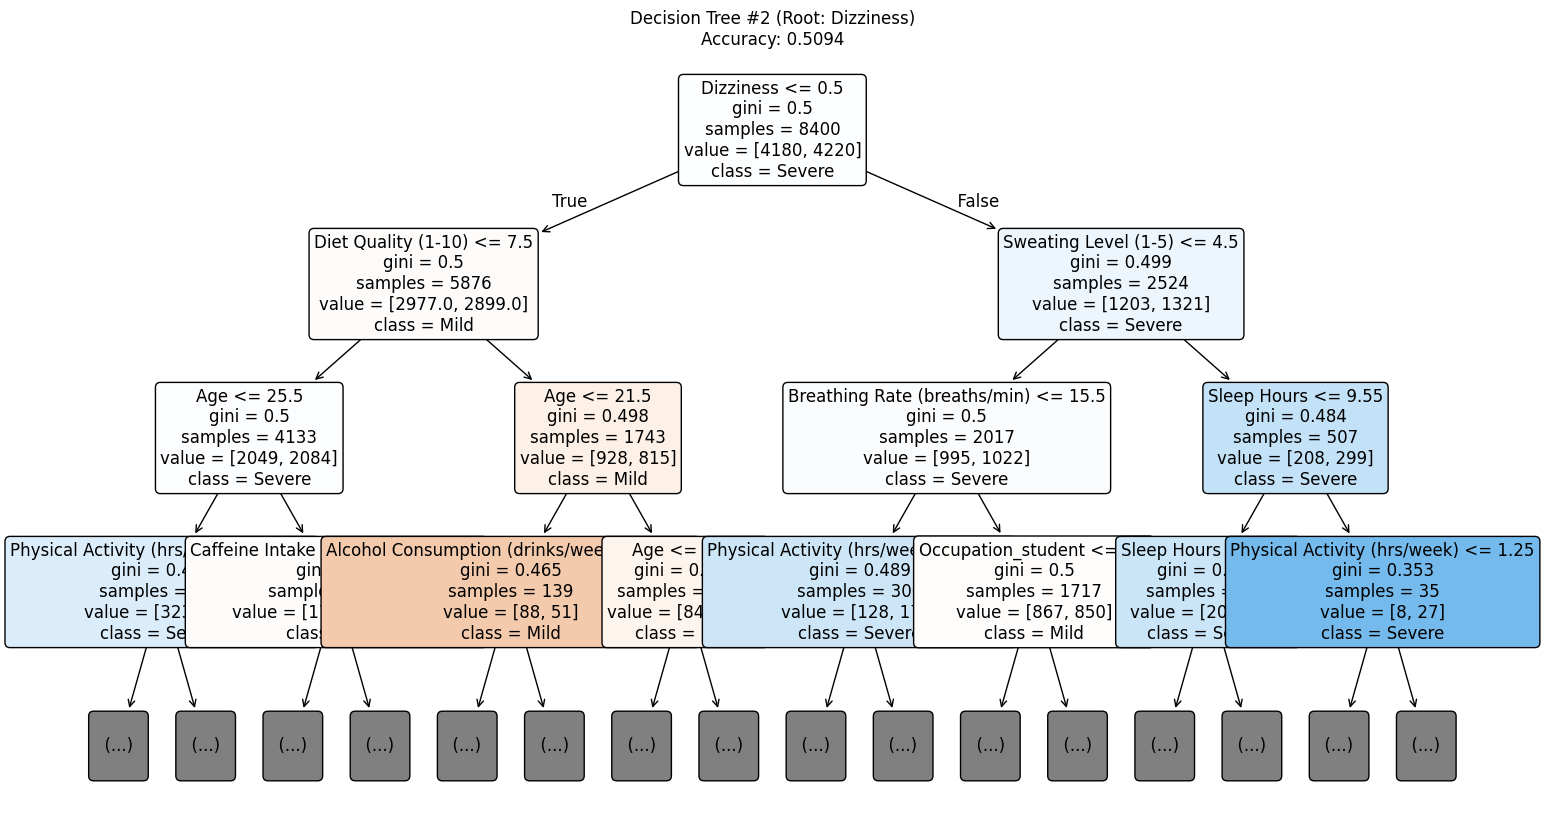

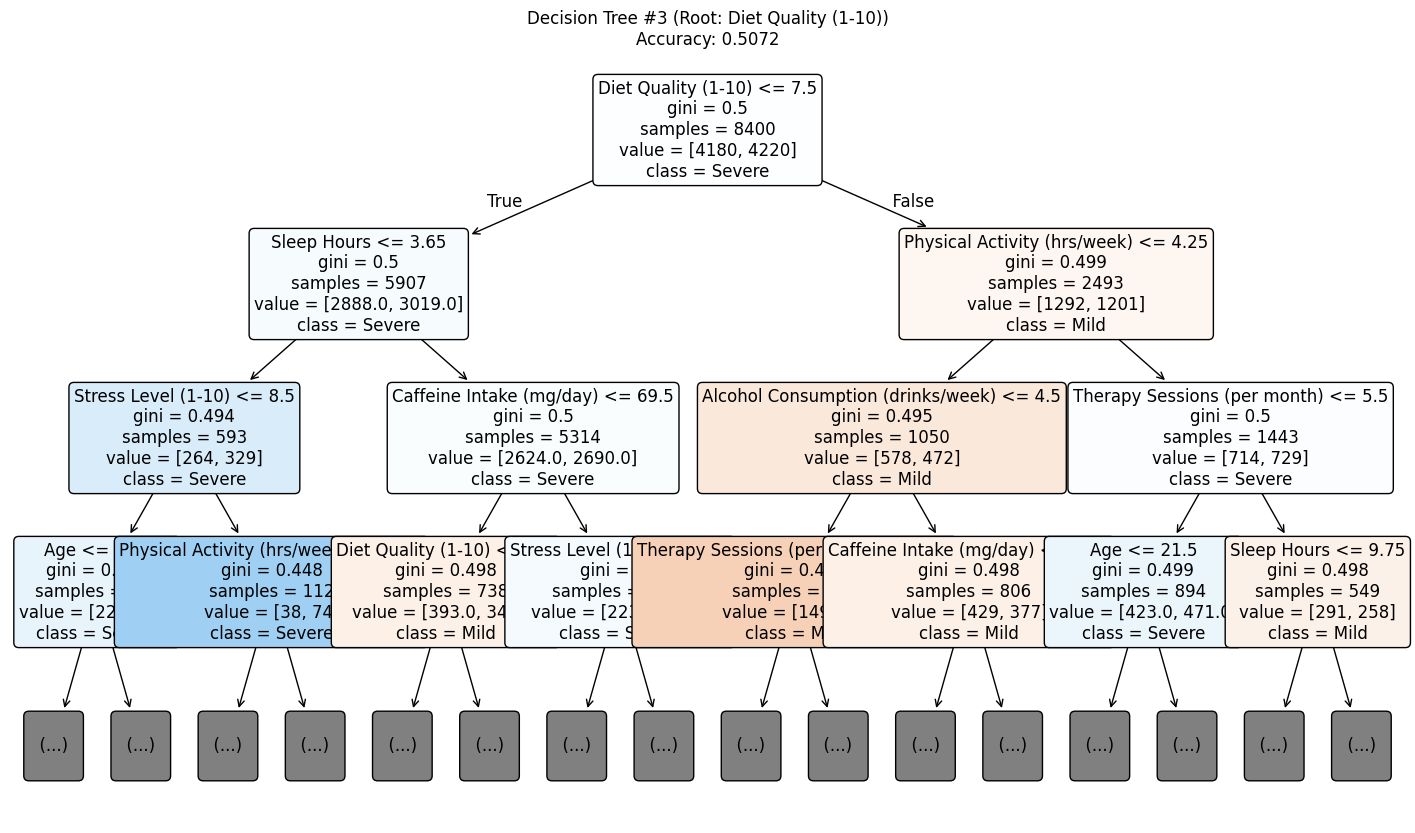

In [ ]:
# ✅ Step 4: Visualize Train vs Test Distribution
plt.figure(figsize=(10, 5))
plt.hist(y_train, bins=2, alpha=0.7, label='Train', color='blue')
plt.hist(y_test, bins=2, alpha=0.7, label='Test', color='orange')
plt.legend()
plt.title("Train vs Test Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# ✅ Step 5: Decision Tree #1 - Full Feature Set
dt1 = DecisionTreeClassifier(random_state=0)
dt1.fit(X_train, y_train)
y_pred_dt1 = dt1.predict(X_test)
acc_dt1 = accuracy_score(y_test, y_pred_dt1)
cm_dt1 = confusion_matrix(y_test, y_pred_dt1)
root_1 = X_train.columns[dt1.tree_.feature[0]]

plt.figure(figsize=(18, 10))
plot_tree(dt1, feature_names=X_train.columns, class_names=['Mild', 'Severe'], filled=True, rounded=True, max_depth=3, fontsize=12)
plt.title(f"Decision Tree #1 (Root: {root_1})\nAccuracy: {acc_dt1:.4f}")
plt.show()

# ✅ Step 6: Decision Tree #2 - Remove Root Feature from Tree #1
X_train_2 = X_train.drop(columns=[root_1])
X_test_2 = X_test.drop(columns=[root_1])
dt2 = DecisionTreeClassifier(random_state=0)
dt2.fit(X_train_2, y_train)
y_pred_dt2 = dt2.predict(X_test_2)
acc_dt2 = accuracy_score(y_test, y_pred_dt2)
cm_dt2 = confusion_matrix(y_test, y_pred_dt2)
root_2 = X_train_2.columns[dt2.tree_.feature[0]]

plt.figure(figsize=(18, 10))
plot_tree(dt2, feature_names=X_train_2.columns, class_names=['Mild', 'Severe'], filled=True, rounded=True, max_depth=3, fontsize=12)
plt.title(f"Decision Tree #2 (Root: {root_2})\nAccuracy: {acc_dt2:.4f}")
plt.show()

# ✅ Step 7: Decision Tree #3 - Remove Roots from Tree #1 & Tree #2
X_train_3 = X_train_2.drop(columns=[root_2])
X_test_3 = X_test_2.drop(columns=[root_2])
dt3 = DecisionTreeClassifier(random_state=0)
dt3.fit(X_train_3, y_train)
y_pred_dt3 = dt3.predict(X_test_3)
acc_dt3 = accuracy_score(y_test, y_pred_dt3)
cm_dt3 = confusion_matrix(y_test, y_pred_dt3)
root_3 = X_train_3.columns[dt3.tree_.feature[0]]

plt.figure(figsize=(18, 10))
plot_tree(dt3, feature_names=X_train_3.columns, class_names=['Mild', 'Severe'], filled=True, rounded=True, max_depth=3, fontsize=12)
plt.title(f"Decision Tree #3 (Root: {root_3})\nAccuracy: {acc_dt3:.4f}")
plt.show()

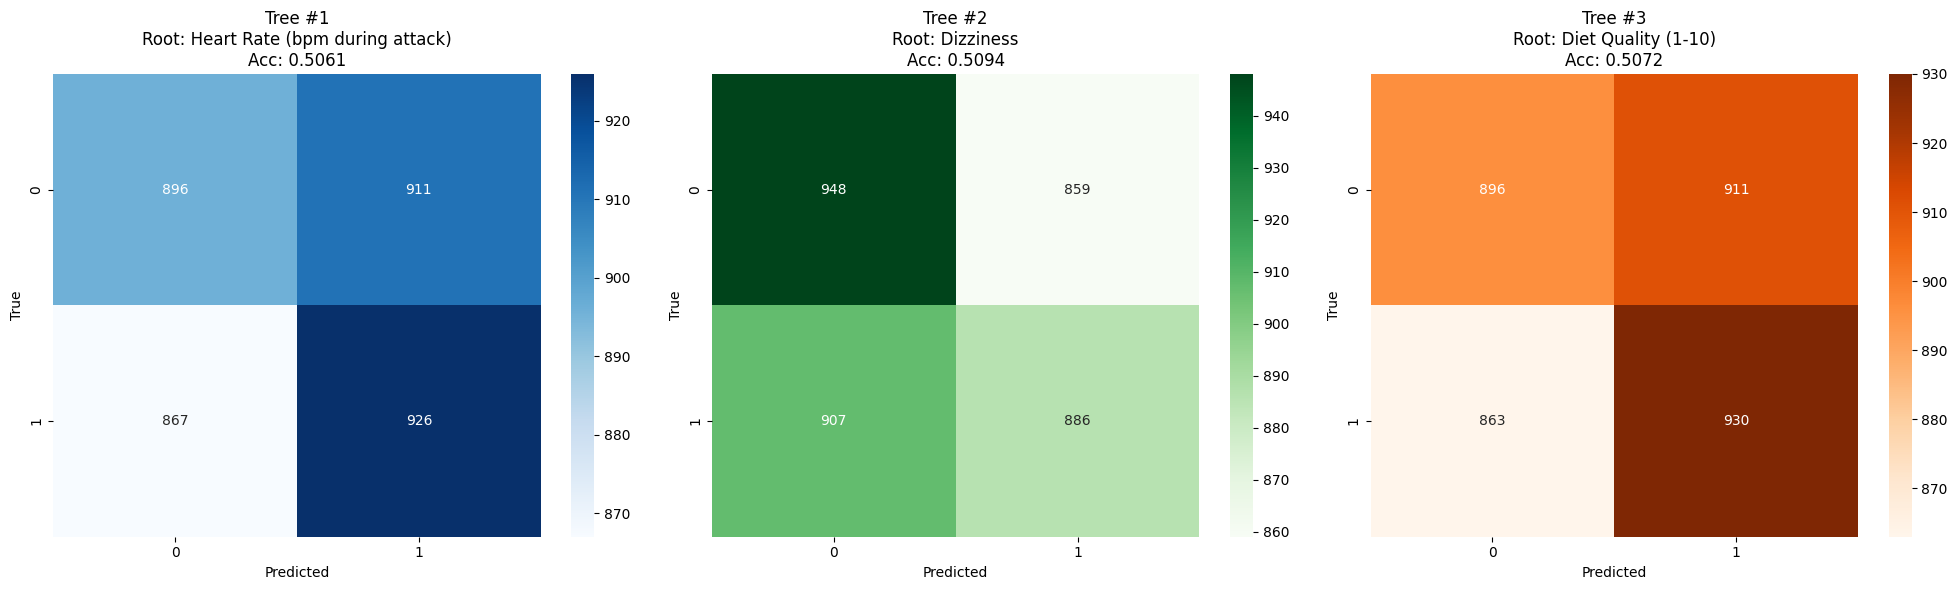

In [ ]:
# ✅ Step 8: Plot Confusion Matrices for All Three Trees
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.heatmap(cm_dt1, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title(f"Tree #1\nRoot: {root_1}\nAcc: {acc_dt1:.4f}")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("True")

sns.heatmap(cm_dt2, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title(f"Tree #2\nRoot: {root_2}\nAcc: {acc_dt2:.4f}")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("True")

sns.heatmap(cm_dt3, annot=True, fmt='d', cmap='Oranges', ax=ax[2])
ax[2].set_title(f"Tree #3\nRoot: {root_3}\nAcc: {acc_dt3:.4f}")
ax[2].set_xlabel("Predicted")
ax[2].set_ylabel("True")

plt.tight_layout()
plt.show()

# **Logistic regression**

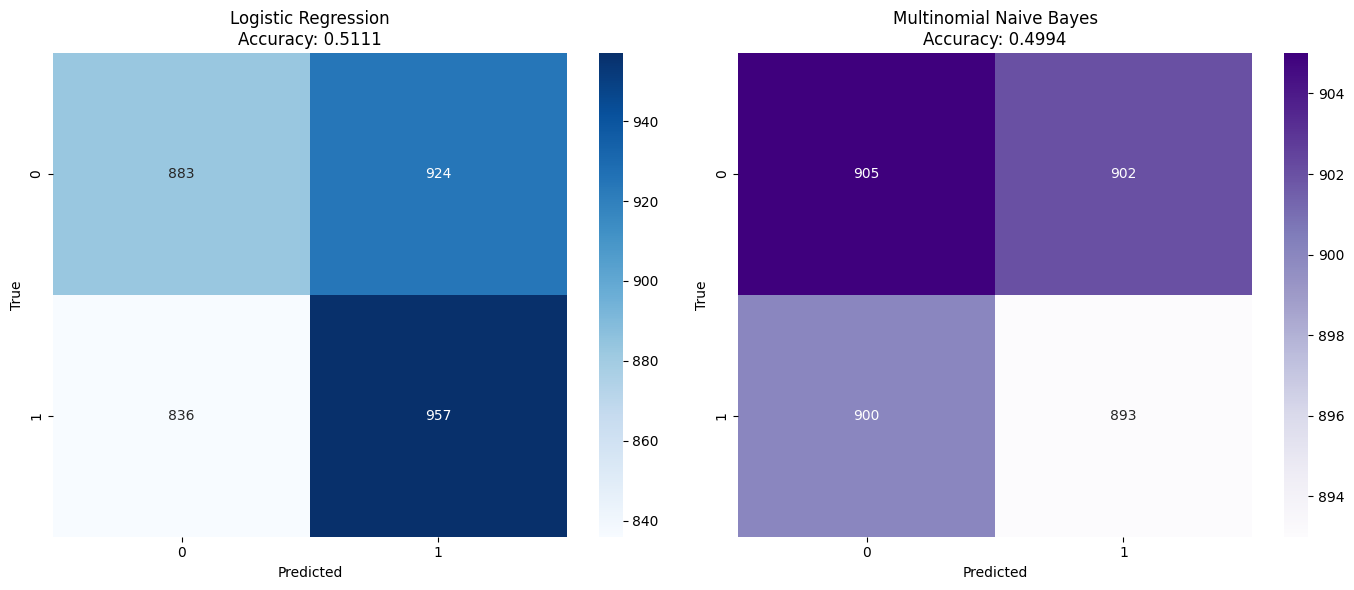

In [ ]:
# ✅ Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# ✅ Step 2: Load and Prepare Dataset (Data Processing Block)
df = pd.read_csv("/content/Clean_Anxiety-dataset - Clean-dataset.csv.csv")
df['severity_binary'] = df['Severity of Anxiety Attack (1-10)'].apply(lambda x: 1 if x >= 6 else 0)

# Encode categorical features
binary_cols = ['Gender', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event', 'Smoking']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# ✅ Step 3: Split Data
X = df.drop(columns=['Severity of Anxiety Attack (1-10)', 'severity_binary'])
y = df['severity_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Save train and test sets with 'lr' in the filenames
X_train.to_csv("X_train_lr.csv", index=False)
X_test.to_csv("X_test_lr.csv", index=False)
y_train.to_csv("y_train_lr.csv", index=False)
y_test.to_csv("y_test_lr.csv", index=False)


# ✅ Step 4: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# ✅ Step 5: Multinomial Naive Bayes (Shifted Numeric Features)
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')
X_train_mnb = X_train_num - X_train_num.min() + 1e-5
X_test_mnb = X_test_num - X_test_num.min() + 1e-5

mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train)
y_pred_mnb = mnb.predict(X_test_mnb)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

# ✅ Step 6: Compare Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title(f"Logistic Regression\nAccuracy: {acc_logreg:.4f}")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("True")

sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Purples', ax=ax[1])
ax[1].set_title(f"Multinomial Naive Bayes\nAccuracy: {acc_mnb:.4f}")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("True")

plt.tight_layout()
plt.show()

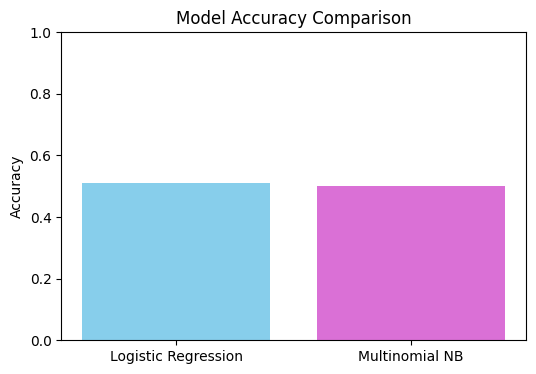


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1807
           1       0.51      0.53      0.52      1793

    accuracy                           0.51      3600
   macro avg       0.51      0.51      0.51      3600
weighted avg       0.51      0.51      0.51      3600


Multinomial NB Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1807
           1       0.50      0.50      0.50      1793

    accuracy                           0.50      3600
   macro avg       0.50      0.50      0.50      3600
weighted avg       0.50      0.50      0.50      3600



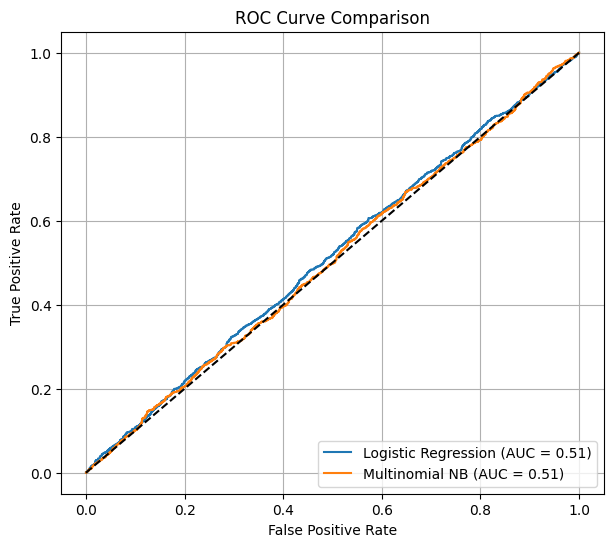

In [ ]:
# ✅ Step 7: Bar Plot of Accuracies
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression', 'Multinomial NB'], [acc_logreg, acc_mnb], color=['skyblue', 'orchid'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# ✅ Step 8: Classification Reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nMultinomial NB Classification Report:")
print(classification_report(y_test, y_pred_mnb))

# ✅ Step 9: ROC Curves
logreg_probs = logreg.predict_proba(X_test)[:, 1]
mnb_probs = mnb.predict_proba(X_test_mnb)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_mnb, tpr_mnb, _ = roc_curve(y_test, mnb_probs)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

plt.figure(figsize=(7, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_mnb, tpr_mnb, label=f'Multinomial NB (AUC = {roc_auc_mnb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
df.to_csv("Processed_LogisticRegression_Data.csv", index=False)

# **SVM**

In [ ]:
!pip install -q scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Clean_Anxiety-dataset - Clean-dataset.csv.csv')

if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)

cat_cols = ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
            'Dizziness', 'Medication', 'Recent Major Life Event']

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df.drop(columns=['Severity of Anxiety Attack (1-10)'])
y = df['Severity of Anxiety Attack (1-10)']

def map_severity(val):
    if val <= 3:
        return 0  # Low
    elif val <= 7:
        return 1  # Moderate
    else:
        return 2  # High

y = y.apply(map_severity)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

X_train_df.to_csv('/content/X_train-svm.csv', index=False)
X_test_df.to_csv('/content/X_test-svm.csv', index=False)
y_train_df.to_csv('/content/y_train-svm.csv', index=False)
y_test_df.to_csv('/content/y_test-svm.csv', index=False)

categorical_df = df[cat_cols]
categorical_df.to_csv('/content/full_encoded_categorical-SVM.csv', index=False)

print("Here is the encoded categorical dataset sample:")
display(categorical_df.head(10))

Here is the encoded categorical dataset sample:


Gender  Occupation  Smoking  Family History of Anxiety  Dizziness  \
0       0           2        0                          0          0   
1       1           4        0                          0          1   
2       0           0        0                          0          0   
3       1           0        0                          1          0   
4       1           3        0                          1          0   
5       1           3        0                          1          0   
6       1           0        1                          1          0   
7       1           4        0                          0          0   
8       1           0        0                          0          0   
9       0           0        0                          1          0   

   Medication  Recent Major Life Event  
0           0                        1  
1           0                        0  
2           0                        1  
3           1                        1  
4           1                        0  
5           1                        1  
6           0                        1  
7           1                        0  
8           0                        0  
9           0                        0

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Linear Kernel, C=0.1
Accuracy: 34.04 %


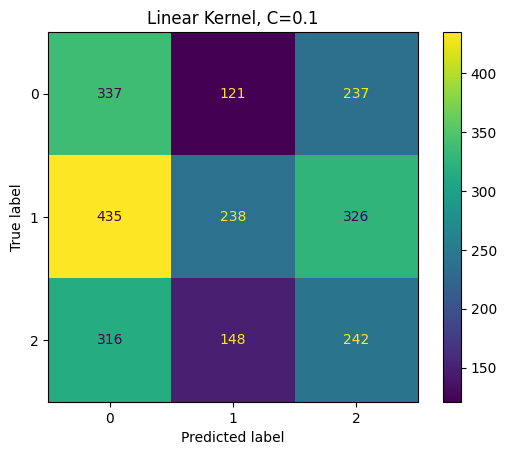


Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.48      0.38       695
           1       0.47      0.24      0.32       999
           2       0.30      0.34      0.32       706

    accuracy                           0.34      2400
   macro avg       0.36      0.36      0.34      2400
weighted avg       0.37      0.34      0.34      2400



In [ ]:
svm_linear = SVC(kernel='linear', C=0.1, max_iter=1000, decision_function_shape='ovr')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print(f"\nLinear Kernel, C=0.1")
print("Accuracy:", round(accuracy_score(y_test, y_pred_linear)*100, 2), "%")
cm_linear = confusion_matrix(y_test, y_pred_linear)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_linear)
disp.plot()
plt.title('Linear Kernel, C=0.1')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Linear Kernel, C=1.0
Accuracy: 34.12 %


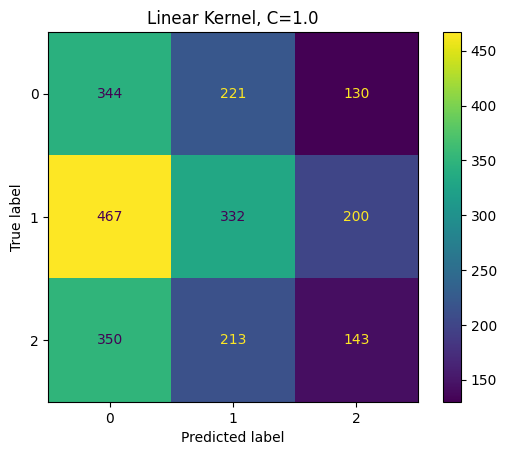


Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.49      0.37       695
           1       0.43      0.33      0.38       999
           2       0.30      0.20      0.24       706

    accuracy                           0.34      2400
   macro avg       0.34      0.34      0.33      2400
weighted avg       0.36      0.34      0.34      2400



In [ ]:
svm_linear = SVC(kernel='linear', C=1.0, max_iter=1000, decision_function_shape='ovr')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print(f"\nLinear Kernel, C=1.0")
print("Accuracy:", round(accuracy_score(y_test, y_pred_linear)*100, 2), "%")
cm_linear = confusion_matrix(y_test, y_pred_linear)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_linear)
disp.plot()
plt.title('Linear Kernel, C=1.0')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Linear Kernel, C=1.5
Accuracy: 32.29 %


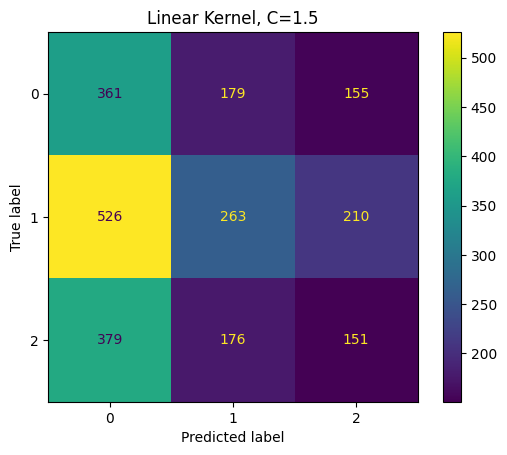


Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.52      0.37       695
           1       0.43      0.26      0.33       999
           2       0.29      0.21      0.25       706

    accuracy                           0.32      2400
   macro avg       0.33      0.33      0.31      2400
weighted avg       0.35      0.32      0.31      2400



In [ ]:
svm_linear = SVC(kernel='linear', C=1.5, max_iter=1000, decision_function_shape='ovr')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print(f"\nLinear Kernel, C=1.5")
print("Accuracy:", round(accuracy_score(y_test, y_pred_linear)*100, 2), "%")
cm_linear = confusion_matrix(y_test, y_pred_linear)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_linear)
disp.plot()
plt.title('Linear Kernel, C=1.5')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Polynomial Kernel (degree=2), C=0.1
Accuracy: 31.08 %


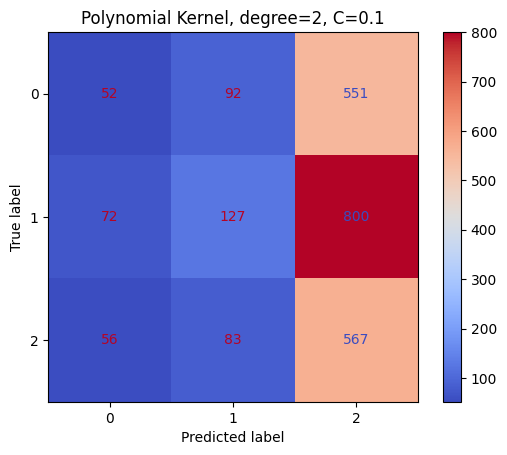


Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.52      0.37       695
           1       0.43      0.26      0.33       999
           2       0.29      0.21      0.25       706

    accuracy                           0.32      2400
   macro avg       0.33      0.33      0.31      2400
weighted avg       0.35      0.32      0.31      2400



In [ ]:
svm_poly = SVC(kernel='poly', degree=2, C=0.1, max_iter=1000, decision_function_shape='ovr')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

print(f"\nPolynomial Kernel (degree=2), C=0.1")
print("Accuracy:", round(accuracy_score(y_test, y_pred_poly)*100, 2), "%")
cm_poly = confusion_matrix(y_test, y_pred_poly)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly)
disp.plot(cmap='coolwarm')
plt.title('Polynomial Kernel, degree=2, C=0.1')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Polynomial Kernel (degree=2), C=1.0
Accuracy: 29.46 %


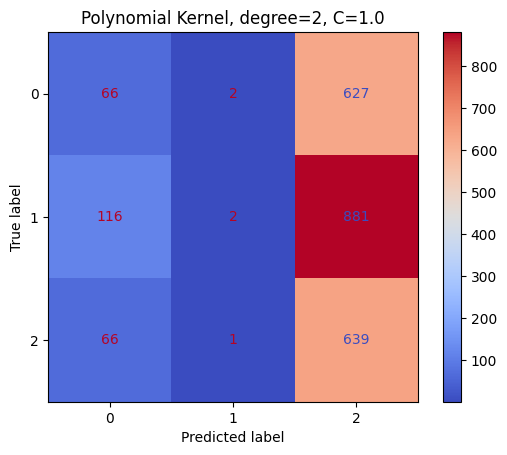


Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.52      0.37       695
           1       0.43      0.26      0.33       999
           2       0.29      0.21      0.25       706

    accuracy                           0.32      2400
   macro avg       0.33      0.33      0.31      2400
weighted avg       0.35      0.32      0.31      2400



In [ ]:
svm_poly = SVC(kernel='poly', degree=2, C=1.0, max_iter=1000, decision_function_shape='ovr')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

print(f"\nPolynomial Kernel (degree=2), C=1.0")
print("Accuracy:", round(accuracy_score(y_test, y_pred_poly)*100, 2), "%")
cm_poly = confusion_matrix(y_test, y_pred_poly)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly)
disp.plot(cmap='coolwarm')
plt.title('Polynomial Kernel, degree=2, C=1.0')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Polynomial Kernel (degree=2), C=1.5
Accuracy: 32.33 %


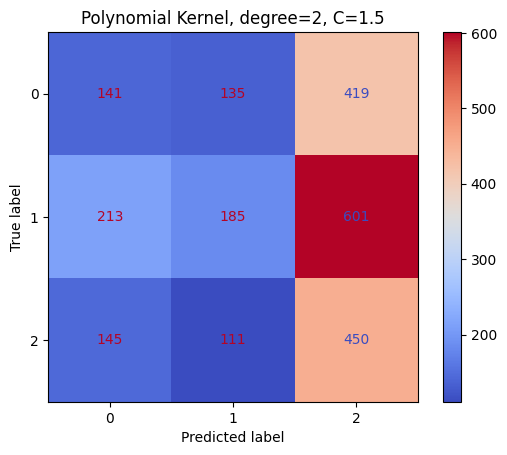


Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.52      0.37       695
           1       0.43      0.26      0.33       999
           2       0.29      0.21      0.25       706

    accuracy                           0.32      2400
   macro avg       0.33      0.33      0.31      2400
weighted avg       0.35      0.32      0.31      2400



In [ ]:
svm_poly = SVC(kernel='poly', degree=2, C=1.5, max_iter=1000, decision_function_shape='ovr')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

print(f"\nPolynomial Kernel (degree=2), C=1.5")
print("Accuracy:", round(accuracy_score(y_test, y_pred_poly)*100, 2), "%")
cm_poly = confusion_matrix(y_test, y_pred_poly)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly)
disp.plot(cmap='coolwarm')
plt.title('Polynomial Kernel, degree=2, C=1.5')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



RBF Kernel, C=0.1
Accuracy: 32.79 %


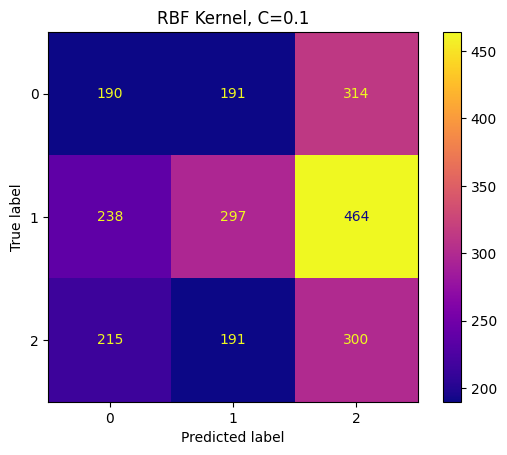


Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.52      0.37       695
           1       0.43      0.26      0.33       999
           2       0.29      0.21      0.25       706

    accuracy                           0.32      2400
   macro avg       0.33      0.33      0.31      2400
weighted avg       0.35      0.32      0.31      2400



In [ ]:
svm_rbf = SVC(kernel='rbf', C=0.1, max_iter=1000, decision_function_shape='ovr')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print(f"\nRBF Kernel, C=0.1")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rbf)*100, 2), "%")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf)
disp.plot(cmap='plasma')
plt.title('RBF Kernel, C=0.1')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



RBF Kernel, C=1.0
Accuracy: 32.21 %


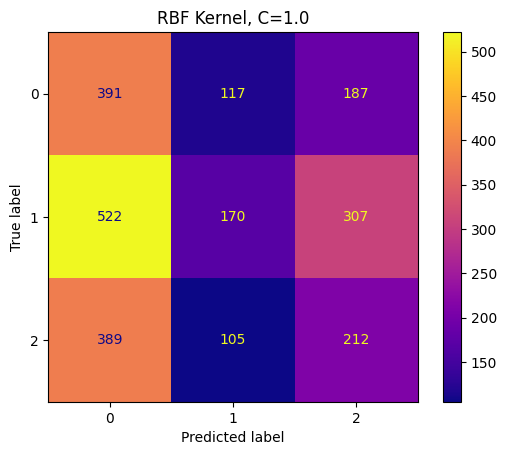


Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.52      0.37       695
           1       0.43      0.26      0.33       999
           2       0.29      0.21      0.25       706

    accuracy                           0.32      2400
   macro avg       0.33      0.33      0.31      2400
weighted avg       0.35      0.32      0.31      2400



In [ ]:
svm_rbf = SVC(kernel='rbf', C=1.0, max_iter=1000, decision_function_shape='ovr')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print(f"\nRBF Kernel, C=1.0")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rbf)*100, 2), "%")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf)
disp.plot(cmap='plasma')
plt.title('RBF Kernel, C=1.0')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



RBF Kernel, C=1.5
Accuracy: 32.88 %


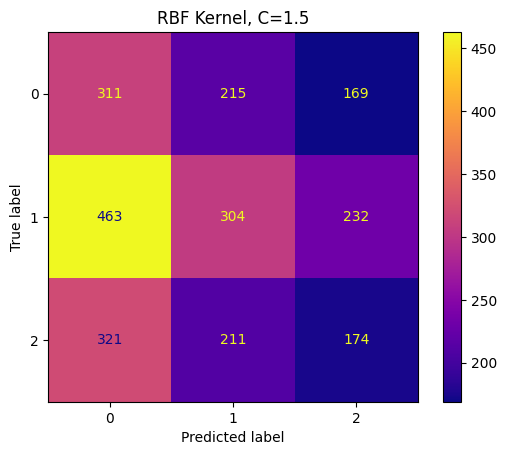


Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.52      0.37       695
           1       0.43      0.26      0.33       999
           2       0.29      0.21      0.25       706

    accuracy                           0.32      2400
   macro avg       0.33      0.33      0.31      2400
weighted avg       0.35      0.32      0.31      2400



In [ ]:
svm_rbf = SVC(kernel='rbf', C=1.5, max_iter=1000, decision_function_shape='ovr')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print(f"\nRBF Kernel, C=1.5")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rbf)*100, 2), "%")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf)
disp.plot(cmap='plasma')
plt.title('RBF Kernel, C=1.5')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

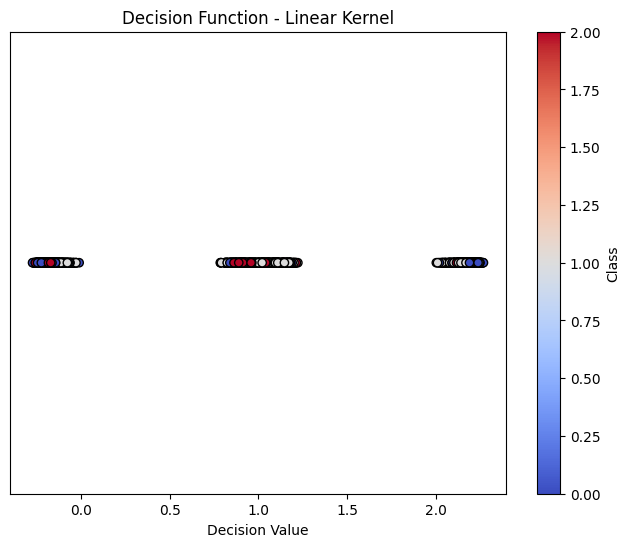

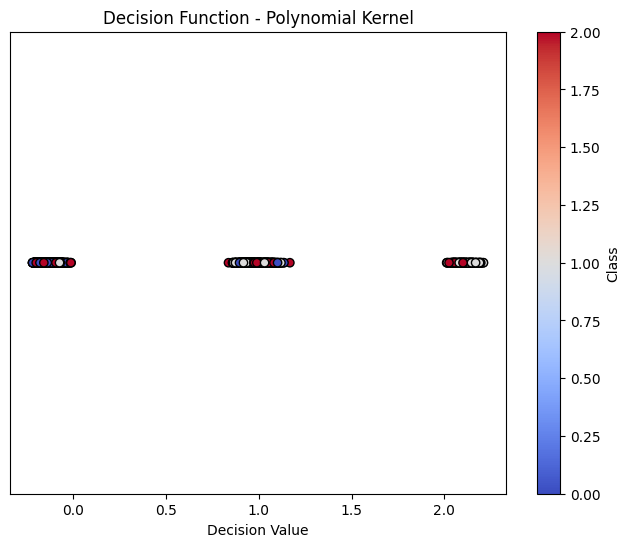

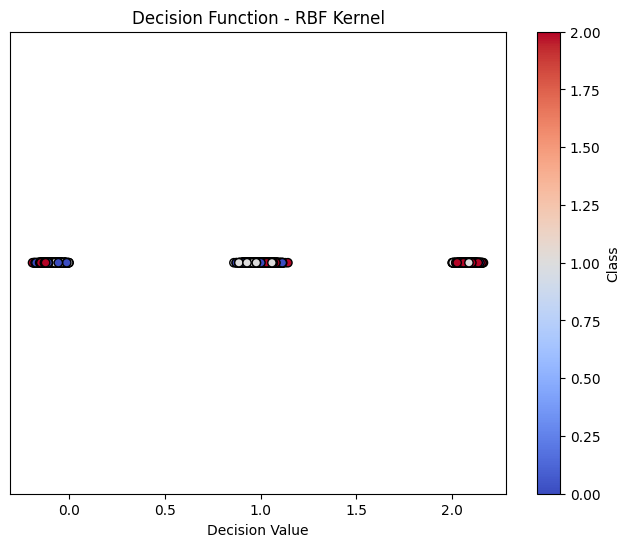

In [ ]:
def plot_decision_function(model, X_test, y_test, title):
    decision_values = model.decision_function(X_test)
    if decision_values.ndim == 1:
        decision_values = decision_values.reshape(-1, 1)

    plt.figure(figsize=(8,6))
    scatter = plt.scatter(decision_values[:, 0], np.zeros_like(decision_values[:, 0]),
                          c=y_test, cmap='coolwarm', edgecolors='k')
    plt.yticks([])
    plt.title(title)
    plt.xlabel('Decision Value')
    plt.colorbar(scatter, label='Class')
    plt.show()

plot_decision_function(svm_linear, X_test, y_test, "Decision Function - Linear Kernel")
plot_decision_function(svm_poly, X_test, y_test, "Decision Function - Polynomial Kernel")
plot_decision_function(svm_rbf, X_test, y_test, "Decision Function - RBF Kernel")

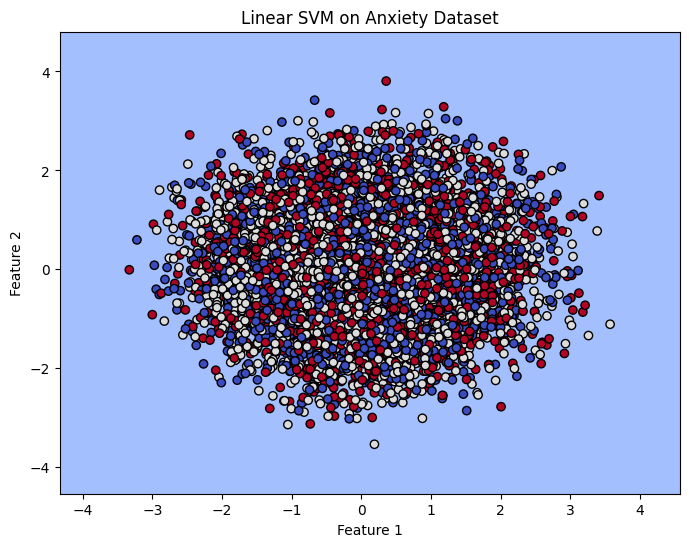

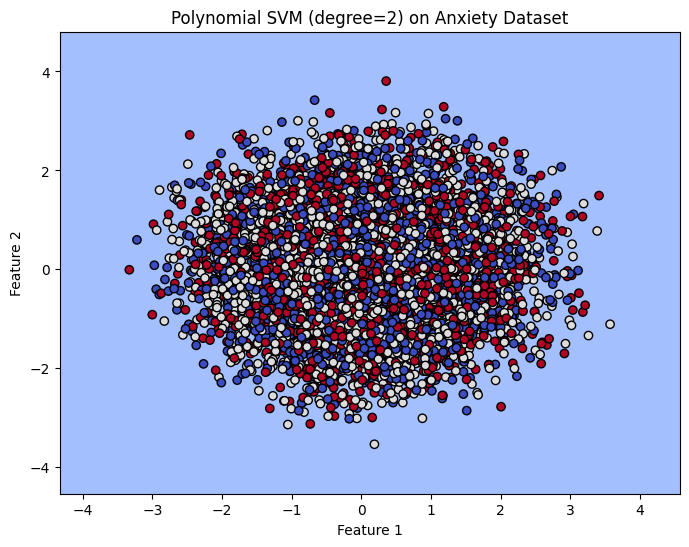

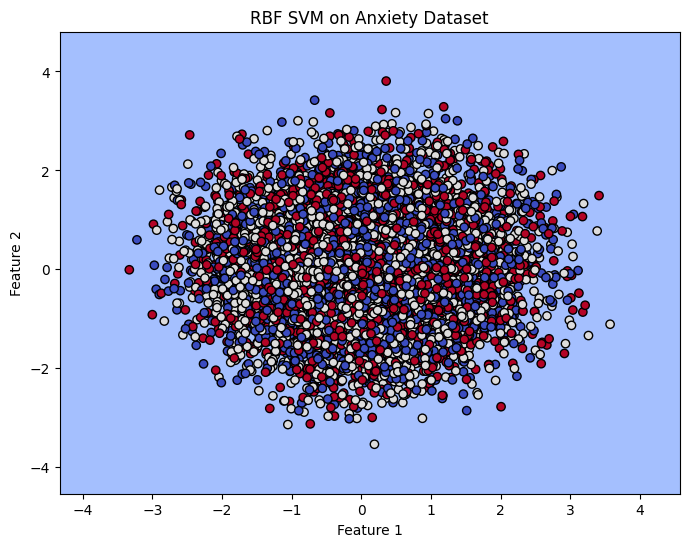

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(8,6))
    h = .02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_2d, y_train)
plot_decision_boundary(X_train_2d, y_train, svm_linear, "Linear SVM on Anxiety Dataset")

svm_poly = SVC(kernel='poly', degree=2, C=1.0)
svm_poly.fit(X_train_2d, y_train)
plot_decision_boundary(X_train_2d, y_train, svm_poly, "Polynomial SVM (degree=2) on Anxiety Dataset")

svm_rbf = SVC(kernel='rbf', C=1.0)
svm_rbf.fit(X_train_2d, y_train)
plot_decision_boundary(X_train_2d, y_train, svm_rbf, "RBF SVM on Anxiety Dataset")

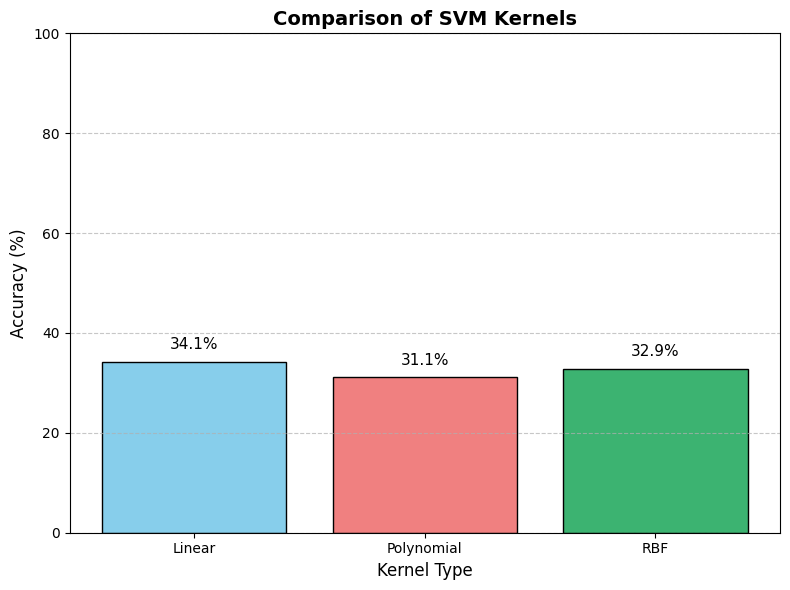

In [ ]:
import matplotlib.pyplot as plt

accuracies = [accuracy_score(y_test, y_pred_linear),
              accuracy_score(y_test, y_pred_poly),
              accuracy_score(y_test, y_pred_rbf)]

kernel_names = ['Linear', 'Polynomial', 'RBF']

plt.figure(figsize=(8,6))
bars = plt.bar(kernel_names, [a*100 for a in accuracies], color=['skyblue', 'lightcoral', 'mediumseagreen'], edgecolor='black')

plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Kernel Type', fontsize=12)
plt.title('Comparison of SVM Kernels', fontsize=14, fontweight='bold')
plt.ylim(0, 100)

for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, f"{round(acc*100,1)}%", ha='center', va='bottom', fontsize=11, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Ensemble Learning (XGBoost)**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/Clean_Anxiety-dataset - Clean-dataset.csv.csv')

df.drop(columns=['ID'], inplace=True)

cat_cols = ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
            'Dizziness', 'Medication', 'Recent Major Life Event']

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df['Severity_Binary'] = (df['Severity of Anxiety Attack (1-10)'] >= 5).astype(int)

X = df.drop(columns=['Severity of Anxiety Attack (1-10)', 'Severity_Binary'])
y = df['Severity_Binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.to_csv('/content/X_train_xgb.csv', index=False)
X_test.to_csv('/content/X_test_xgb.csv', index=False)
y_train.to_csv('/content/y_train_xgb.csv', index=False)
y_test.to_csv('/content/y_test_xgb.csv', index=False)

train_df = X_train.copy()
train_df['Severity_Binary'] = y_train
train_df['Split'] = 'train'

test_df = X_test.copy()
test_df['Severity_Binary'] = y_test
test_df['Split'] = 'test'

final_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
final_df.to_csv('/content/Anxiety_Transformed_With_Split.csv', index=False)

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [1, 1.5, 2],
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train_binary)

print("Best Parameters Found:", random_search.best_params_)

best_xgb = random_search.best_estimator_

y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test_binary, y_pred)
print(f"Binary Classification Accuracy: {accuracy*100:.2f} %")

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:42:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters Found: {'subsample': 0.7, 'reg_lambda': 2, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}
Binary Classification Accuracy: 59.96 %


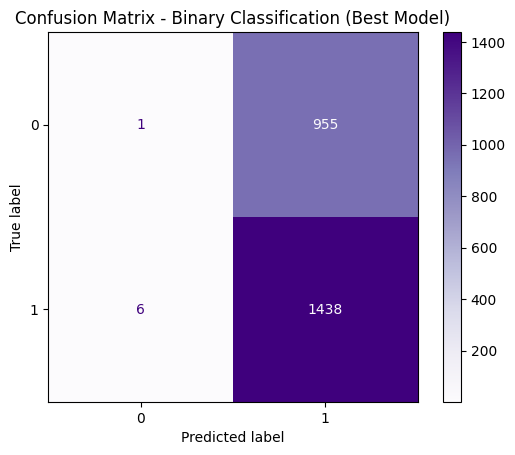

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.00      0.00       956
           1       0.60      1.00      0.75      1444

    accuracy                           0.60      2400
   macro avg       0.37      0.50      0.38      2400
weighted avg       0.42      0.60      0.45      2400



In [ ]:
cm = confusion_matrix(y_test_binary, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title('Confusion Matrix - Binary Classification (Best Model)')
plt.show()

print("Classification Report:")
print(classification_report(y_test_binary, y_pred))

<Figure size 1000x600 with 0 Axes>

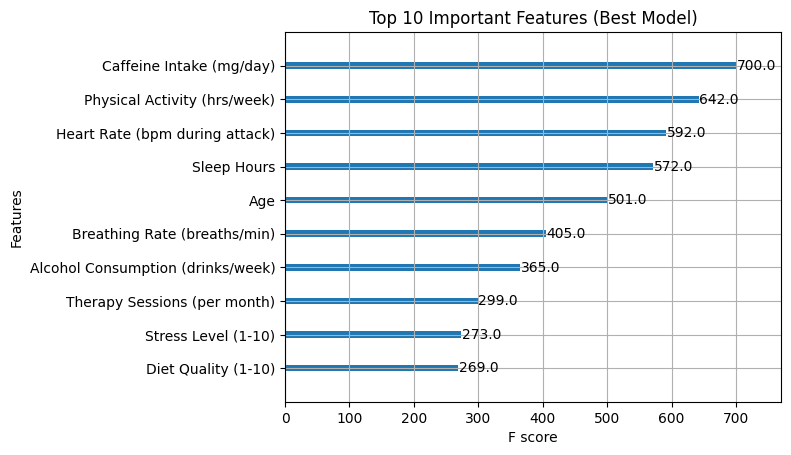

In [ ]:
plt.figure(figsize=(10,6))
plot_importance(best_xgb, max_num_features=10, importance_type='weight')
plt.title('Top 10 Important Features (Best Model)')
plt.show()